In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import  LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
!pip install catboost
!pip install xgboost

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.shape

(74111, 29)

In [5]:
df

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206.0,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0


In [6]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [7]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [9]:
df.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [10]:
df.head(5)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [11]:
null_values = df.isnull()
print(null_values)

          id  log_price  property_type  room_type  amenities  accommodates  \
0      False      False          False      False      False         False   
1      False      False          False      False      False         False   
2      False      False          False      False      False         False   
3      False      False          False      False      False         False   
4      False      False          False      False      False         False   
...      ...        ...            ...        ...        ...           ...   
74106  False      False          False      False      False         False   
74107  False      False          False      False      False         False   
74108  False      False          False      False      False         False   
74109  False      False          False      False      False         False   
74110  False      False          False      False      False         False   

       bathrooms  bed_type  cancellation_policy  cleaning_fee  

In [12]:
# Total null value count in the DataFrame
total_null_count = df.isnull().sum().sum()
# Null value count in a specific column
host_response_rate_null_count = df['host_response_rate'].isnull().sum()
# Displaying the null value counts
print("Total null count in DataFrame:", total_null_count)
print("Null count in 'Age' column:", host_response_rate_null_count)

Total null count in DataFrame: 83752
Null count in 'Age' column: 18299


In [13]:
#column_name = 'host_identity_verified'
#if column_name in df.columns:
#    df = df.drop(column_name, axis=1)
#    print("Column '{}' successfully dropped.".format(column_name))
#else:
#    print("Column '{}' not found in the DataFrame.".format(column_name))

In [14]:
print("Total null count in DataFrame:", total_null_count)

Total null count in DataFrame: 83752


In [15]:
index = [
    "host_response_rate", "property_type", "room_type", "accommodates", "bathrooms",
    "bed_type", "cancellation_policy", "cleaning_fee", "city", "instant_bookable",
    "beds", "bedrooms", "neighbourhood", "first_review", "last_review", "zipcode",
    "name", "host_since", "thumbnail_url", "latitude", "longitude",
    "host_has_profile_pic"
]

for i in index:
    print(df[i].value_counts(), "\n")
    print("---------------------------------------------------------------")


100%    43254
90%      2277
80%      1113
0%        883
50%       611
        ...  
39%         1
15%         1
31%         1
21%         1
6%          1
Name: host_response_rate, Length: 80, dtype: int64 

---------------------------------------------------------------
Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
C

In [16]:
for column in df.columns:
    
    if df[column].isnull().sum() != 0:
        
        print("========================================")
        print("\n{} :- {},  dtypes : {}".format(column,df[column].isnull().sum(),df[column].dtypes))


bathrooms :- 200,  dtypes : float64

first_review :- 15864,  dtypes : object

host_has_profile_pic :- 188,  dtypes : object

host_identity_verified :- 188,  dtypes : object

host_response_rate :- 18299,  dtypes : object

host_since :- 188,  dtypes : object

last_review :- 15827,  dtypes : object

neighbourhood :- 6872,  dtypes : object

review_scores_rating :- 16722,  dtypes : float64

thumbnail_url :- 8216,  dtypes : object

zipcode :- 966,  dtypes : object

bedrooms :- 91,  dtypes : float64

beds :- 131,  dtypes : float64


In [17]:
df.last_review.fillna(method="ffill",inplace=True)


In [18]:
df.first_review.fillna(method="ffill",inplace=True)

In [19]:
df.host_since.fillna(method="ffill",inplace=True)

In [20]:
df.host_response_rate.fillna(method="ffill",inplace=True)

In [21]:
print("Total null count in DataFrame:", total_null_count)

Total null count in DataFrame: 83752


C:\Users\hp\AppData\Local\Temp\ipykernel_12940\1228913415.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["bathrooms"])


<Axes: xlabel='bathrooms', ylabel='Density'>

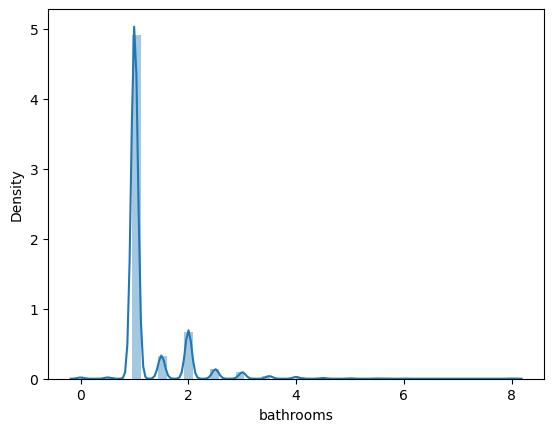

In [22]:
sns.distplot(df["bathrooms"])

In [23]:
df["bathrooms"] = df['bathrooms'].fillna(round(df["bathrooms"].median()))

C:\Users\hp\AppData\Local\Temp\ipykernel_12940\3624978623.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["bedrooms"])


<Axes: xlabel='bedrooms', ylabel='Density'>

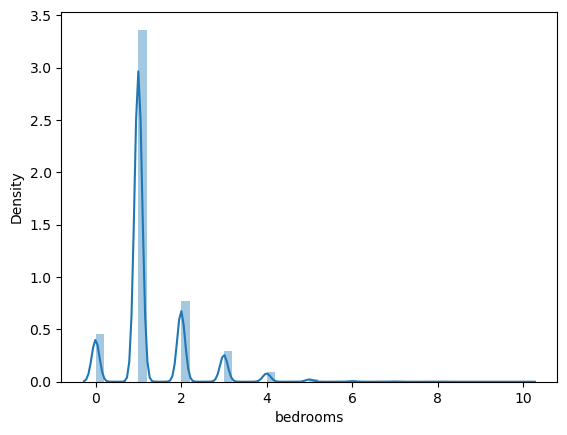

In [24]:
sns.distplot(df["bedrooms"])

C:\Users\hp\AppData\Local\Temp\ipykernel_12940\2096924902.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["review_scores_rating"])


<Axes: xlabel='review_scores_rating', ylabel='Density'>

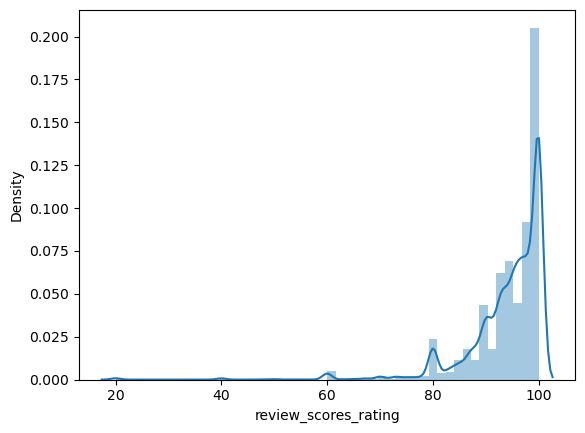

In [25]:
sns.distplot(df["review_scores_rating"])

In [26]:
df["review_scores_rating"] = df["review_scores_rating"].fillna(0)

C:\Users\hp\AppData\Local\Temp\ipykernel_12940\2887686481.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["bedrooms"])


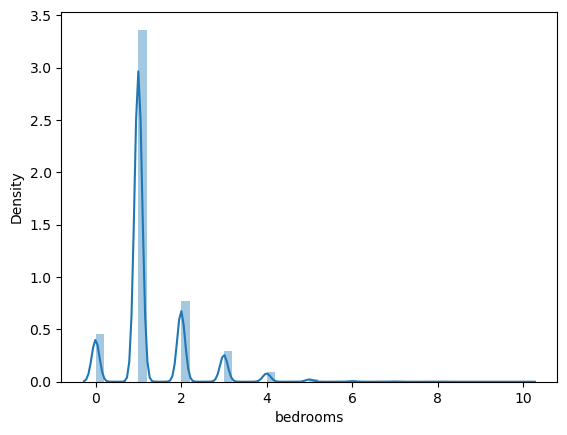

In [27]:
sns.distplot(df["bedrooms"])
plt.show()

In [28]:
df["bedrooms"] = df['bedrooms'].fillna((df["bathrooms"].median()))

C:\Users\hp\AppData\Local\Temp\ipykernel_12940\3721278667.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["beds"])


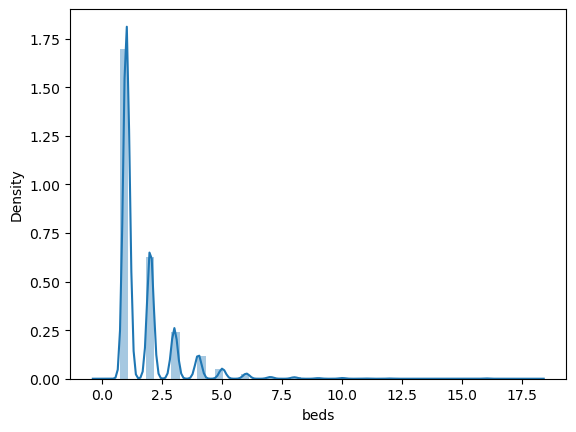

In [29]:
sns.distplot(df["beds"])
plt.show()

In [30]:
df["beds"] = df["beds"].fillna((df["bathrooms"].median()))

In [31]:
amenities_count = []
for i in df["amenities"]:
    amenities_count.append(len(i))
    
df["amenities"] = amenities_count

In [32]:
# Function to plot catplot graphs
def plot_catplot(h,v,he,a):
    sns.set(font_scale=1.5)
    sns.catplot(x=h,kind=v,data=df,height=he, aspect = a)
    
# Function to plot catplot graphs
def plot_piechart(h):
    sns.set(font_scale=1.5)
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_axes([0,0,1,1])
    ax.axis('equal')
    langs = list(df[h].unique())
    students =list(df[h].value_counts())
    ax.pie(students, labels = langs,autopct='%1.2f%%')
    plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_12940\2516454913.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["log_price"])


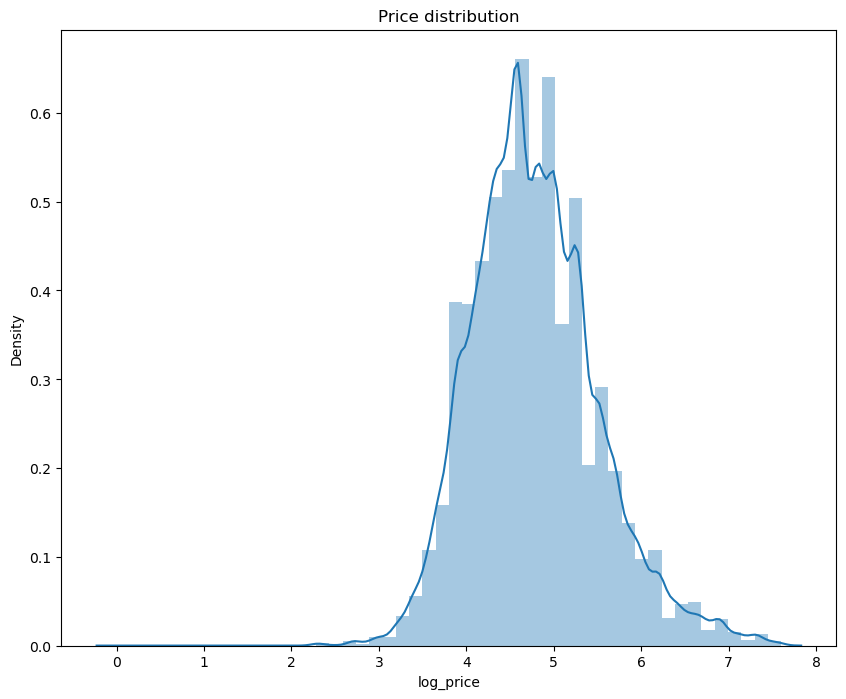

In [33]:
plt.figure(figsize = (10, 8))
sns.distplot(df["log_price"])
plt.title('Price distribution')
plt.show()

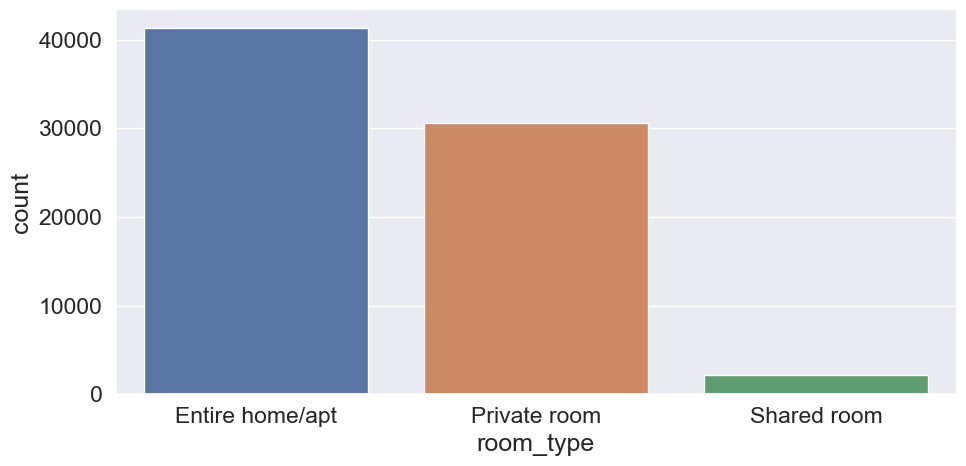

In [34]:
plot_catplot("room_type", "count", 5, 2)

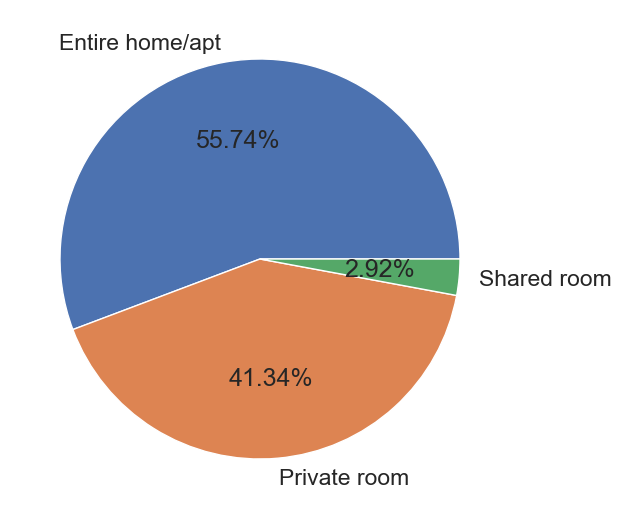

In [35]:
plot_piechart("room_type") 

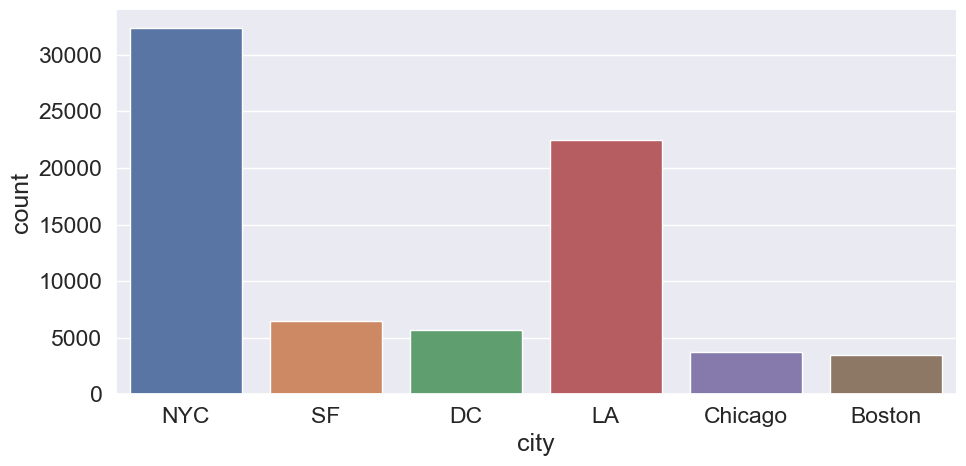

In [36]:
plot_catplot("city","count", 5, 2)

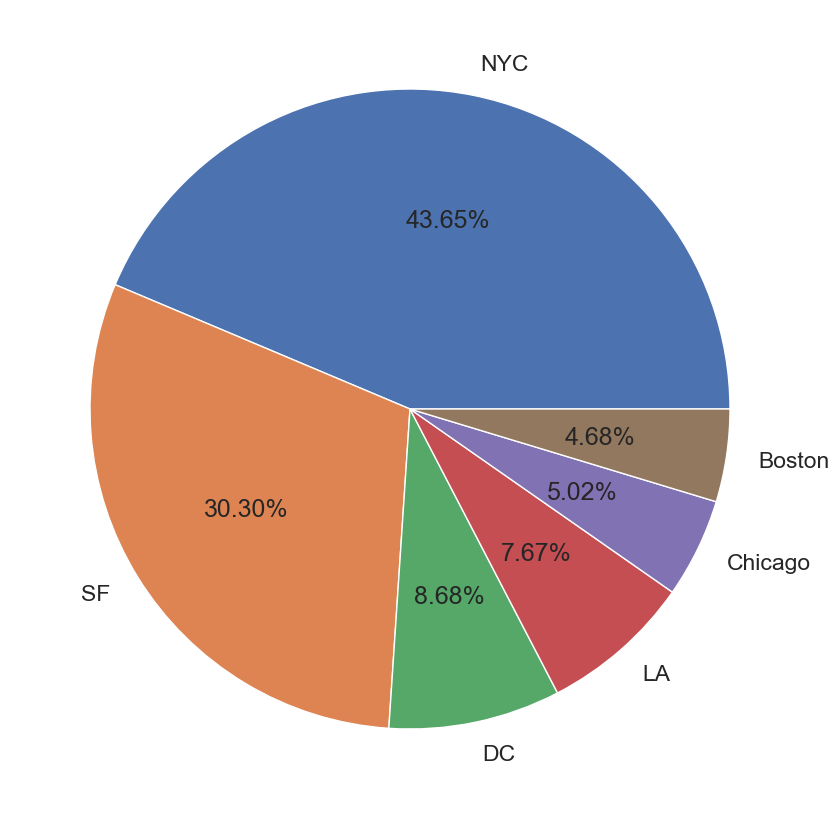

In [37]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = list(df.city.unique())
students =list(df.city.value_counts())
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.show()

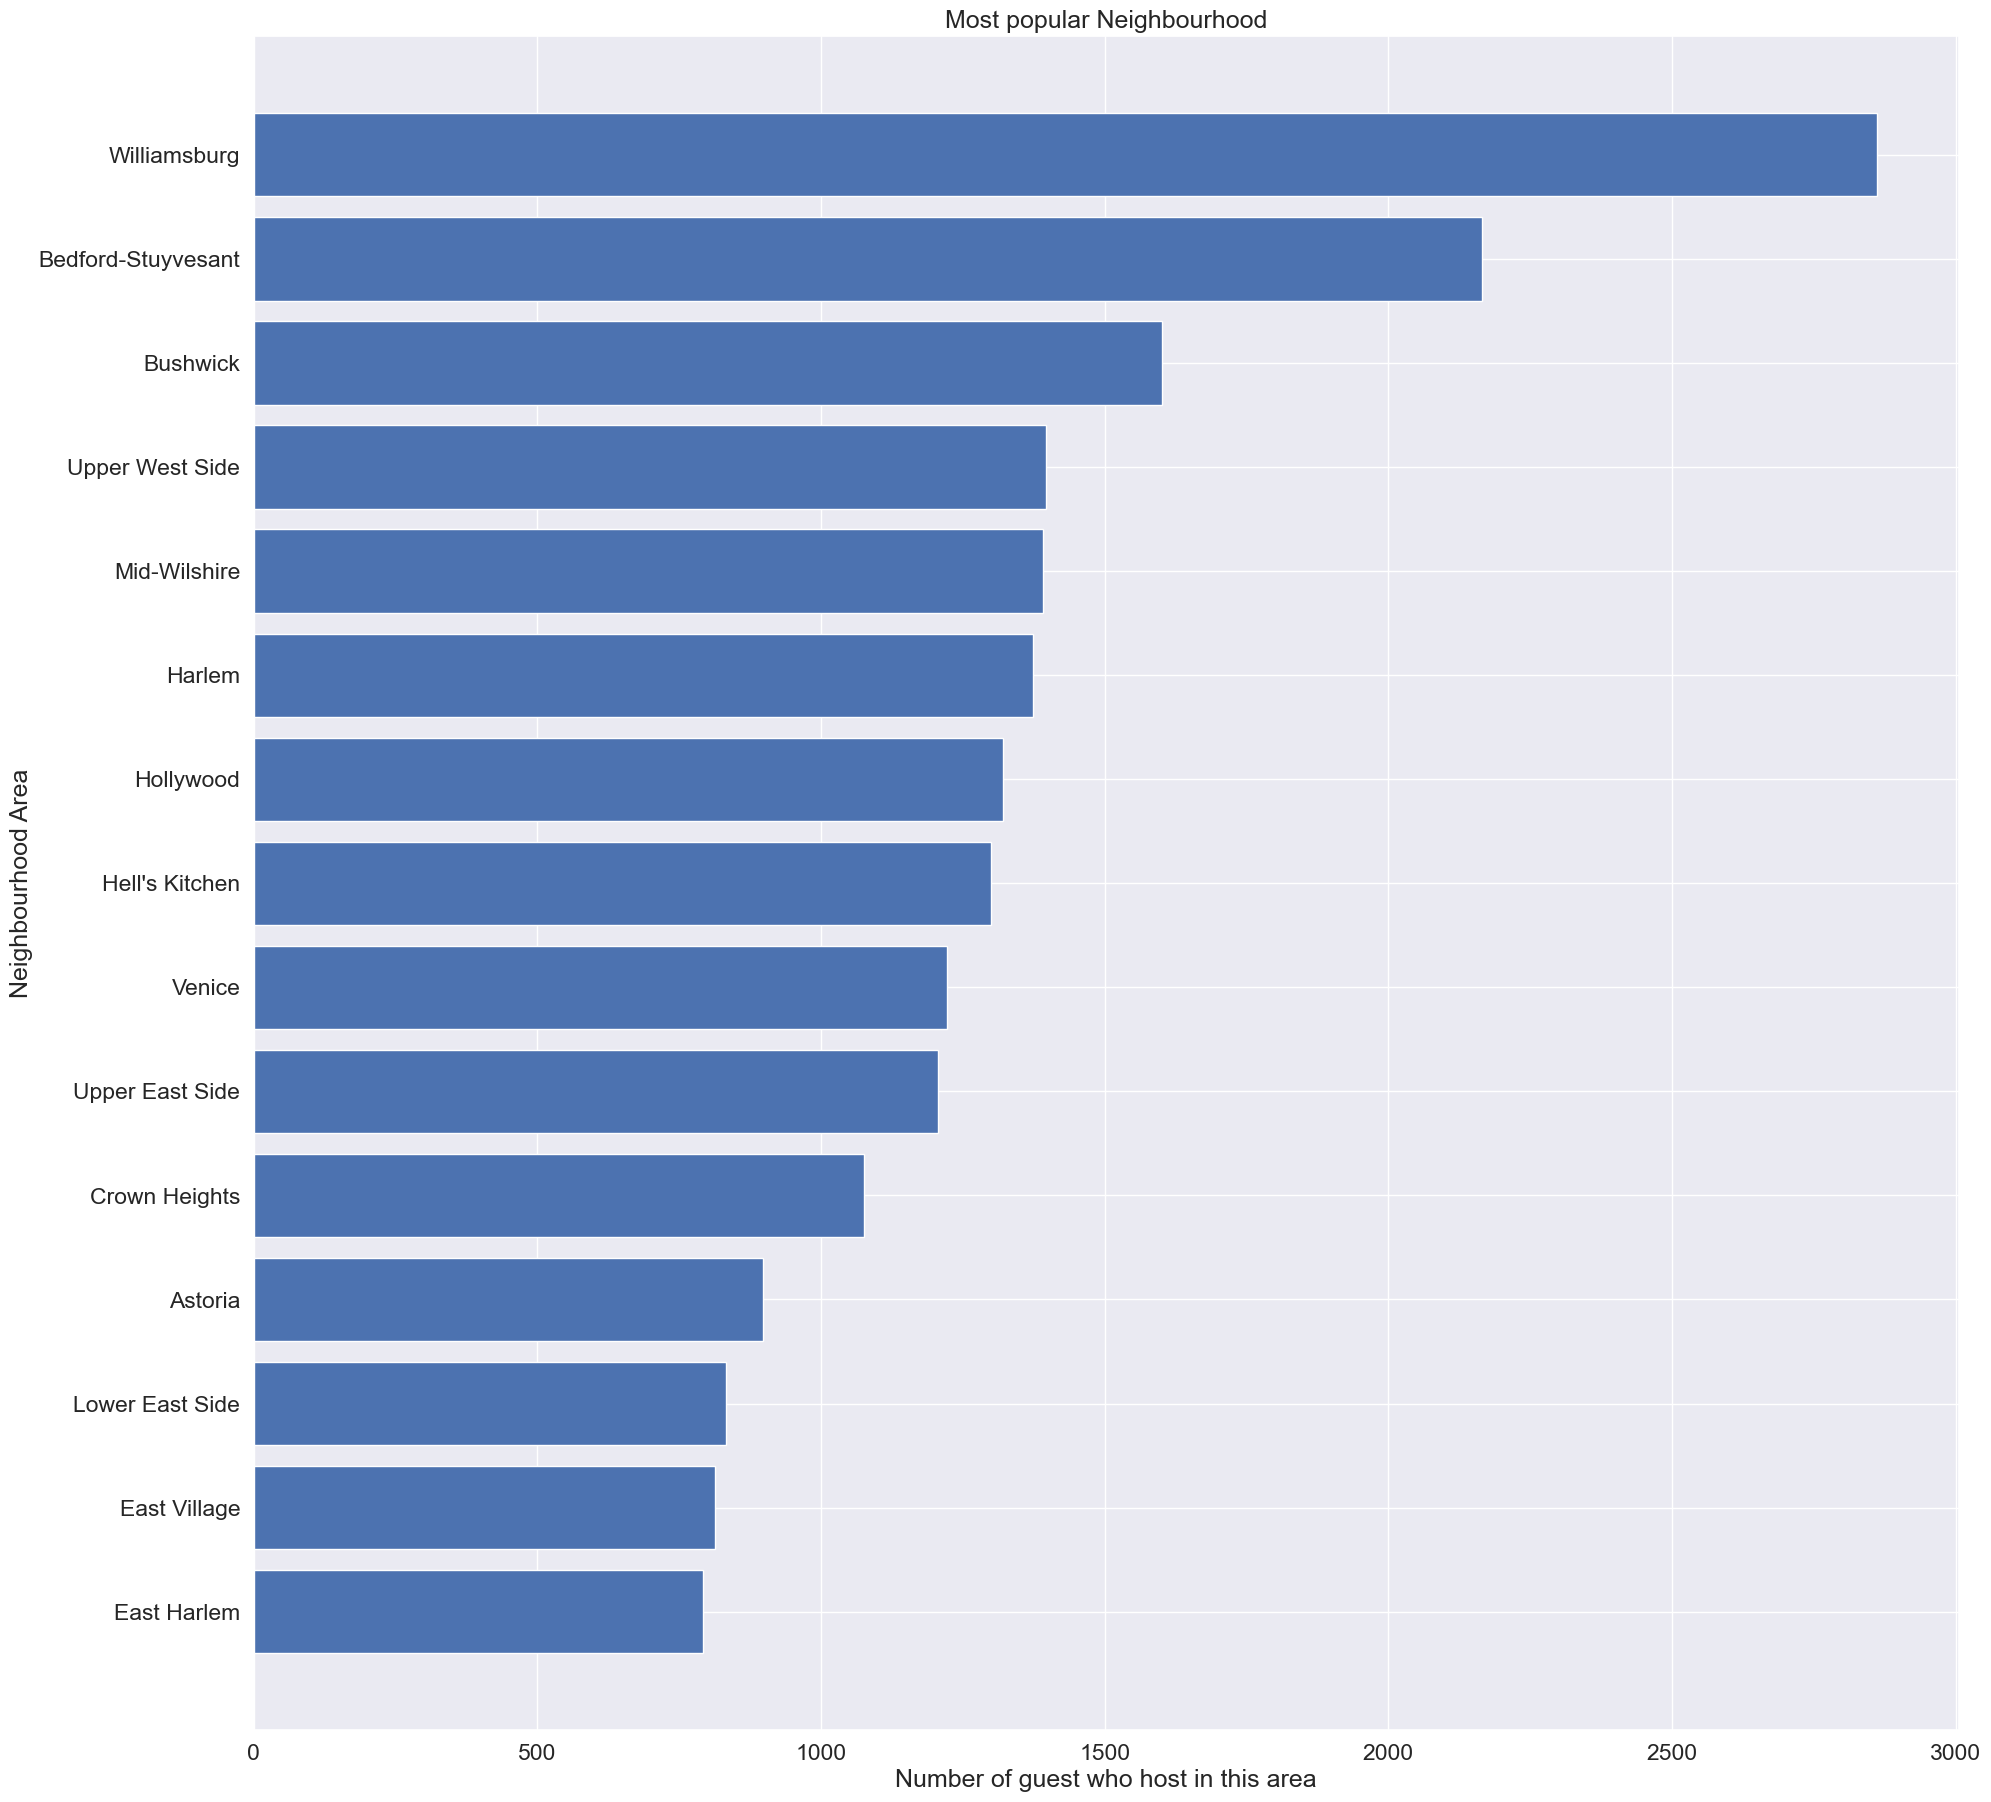

In [38]:
data = df.neighbourhood.value_counts()[:15]
plt.figure(figsize=(22,22))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest who host in this area")

plt.barh(x,y)
plt.show()

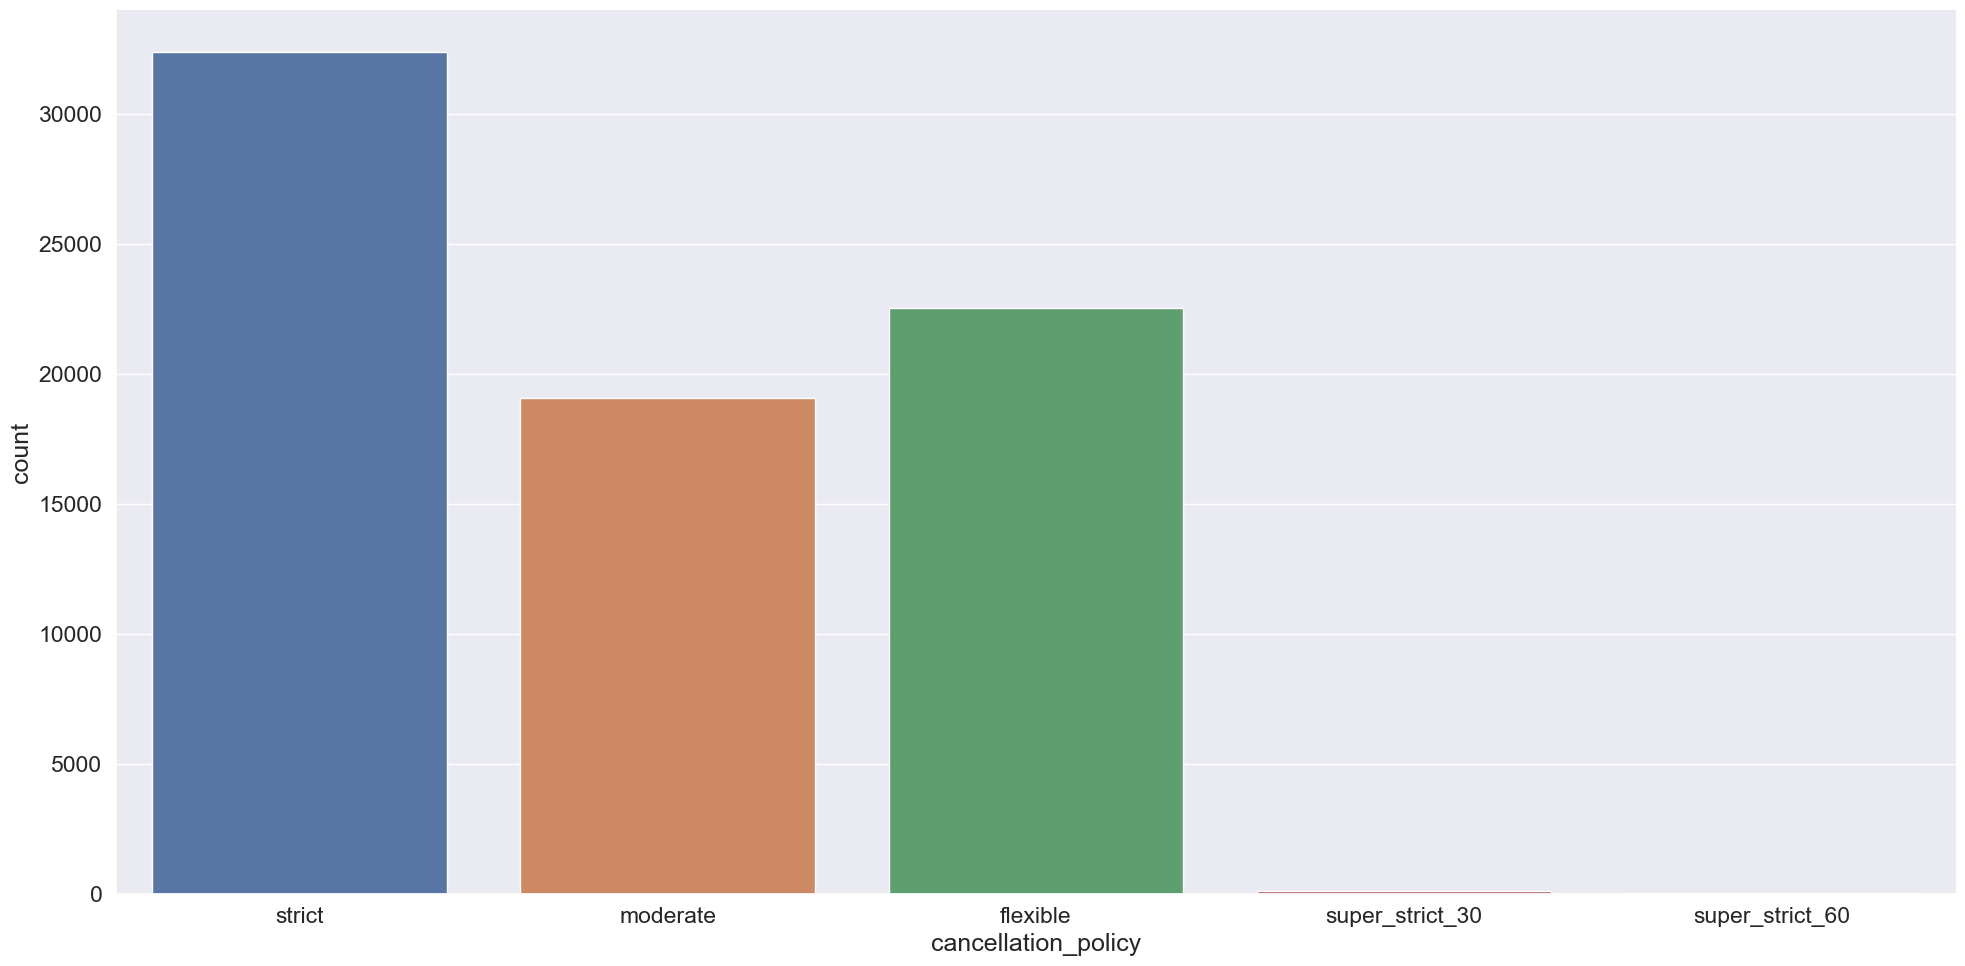

In [39]:
plot_catplot("cancellation_policy","count",10, 2)

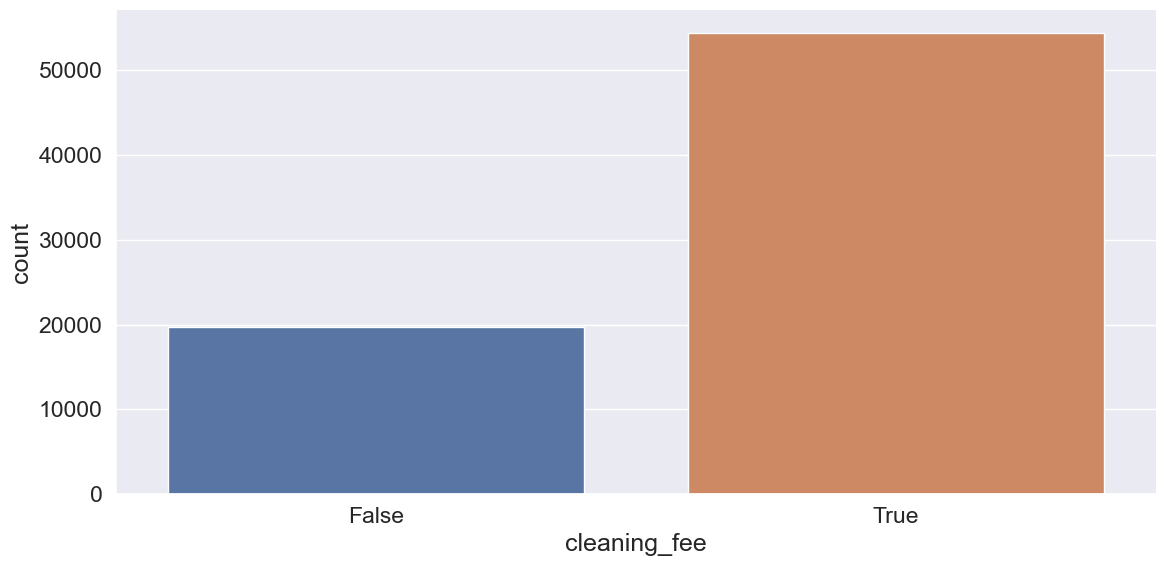

In [40]:
plot_catplot("cleaning_fee","count",6,2)

In [41]:
def plot_violinplot(h,v):
    plt.figure(figsize=(15,8))
    sns.set(font_scale=1.5)
    sns.violinplot(data=df, x=h, y=v, palette='GnBu_d')
    plt.title('Density and distribution of prices ', fontsize=15)
    plt.xlabel(h)
    plt.ylabel(v)

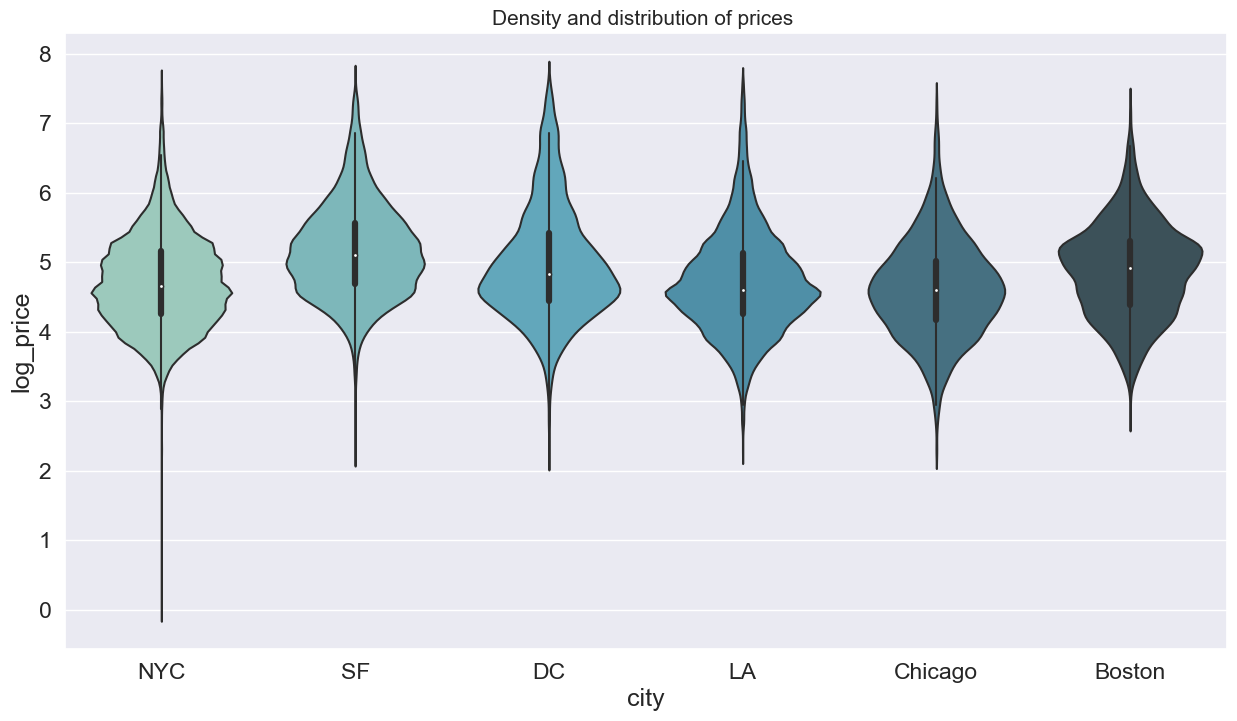

In [42]:
plot_violinplot("city","log_price")

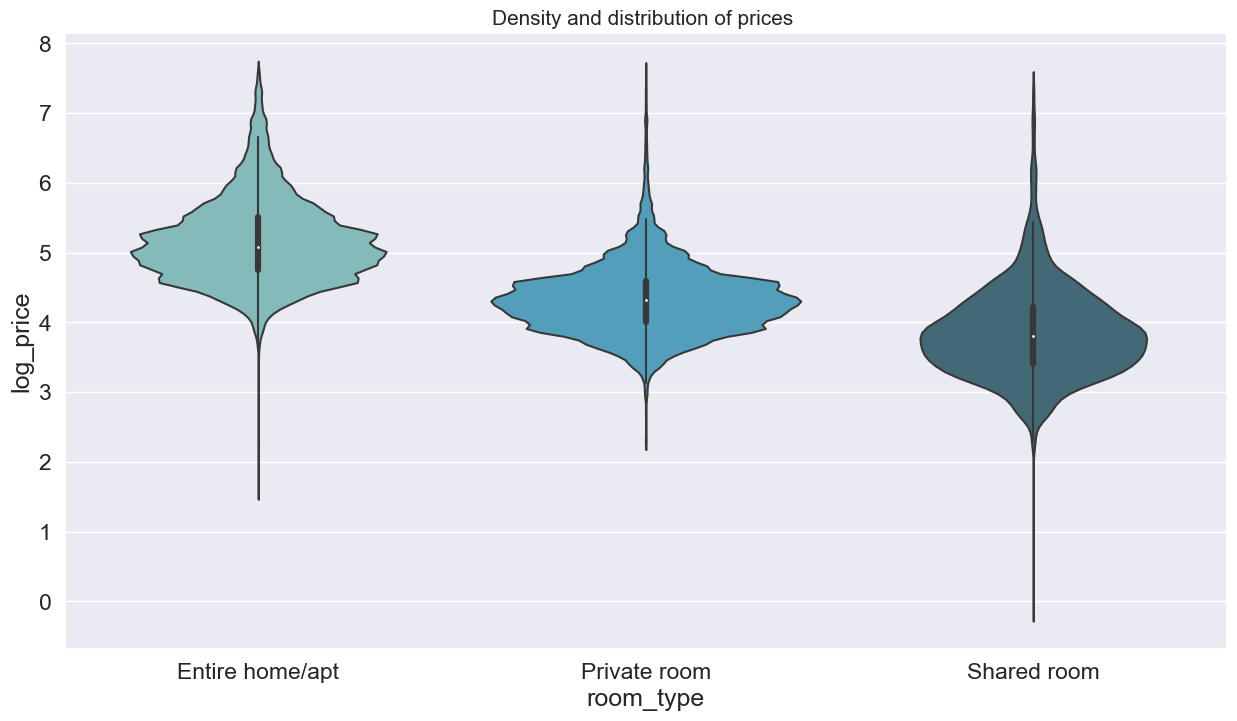

In [43]:
plot_violinplot("room_type","log_price")

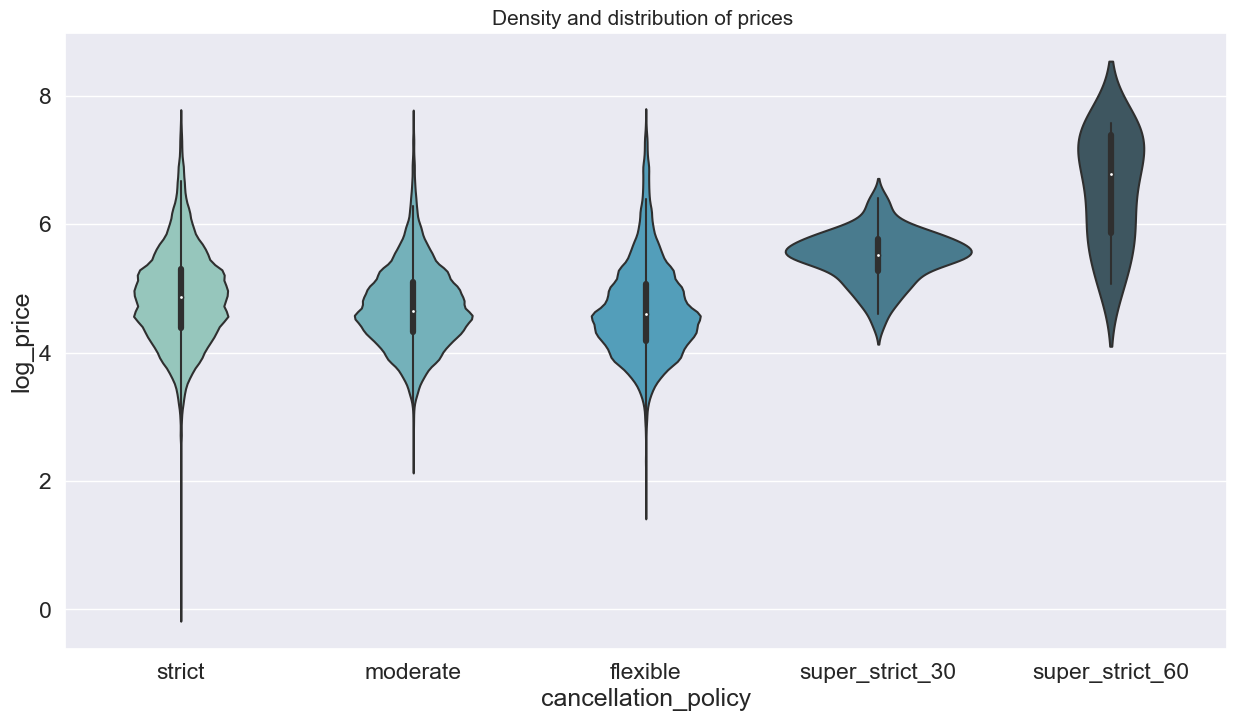

In [44]:
plot_violinplot("cancellation_policy","log_price")

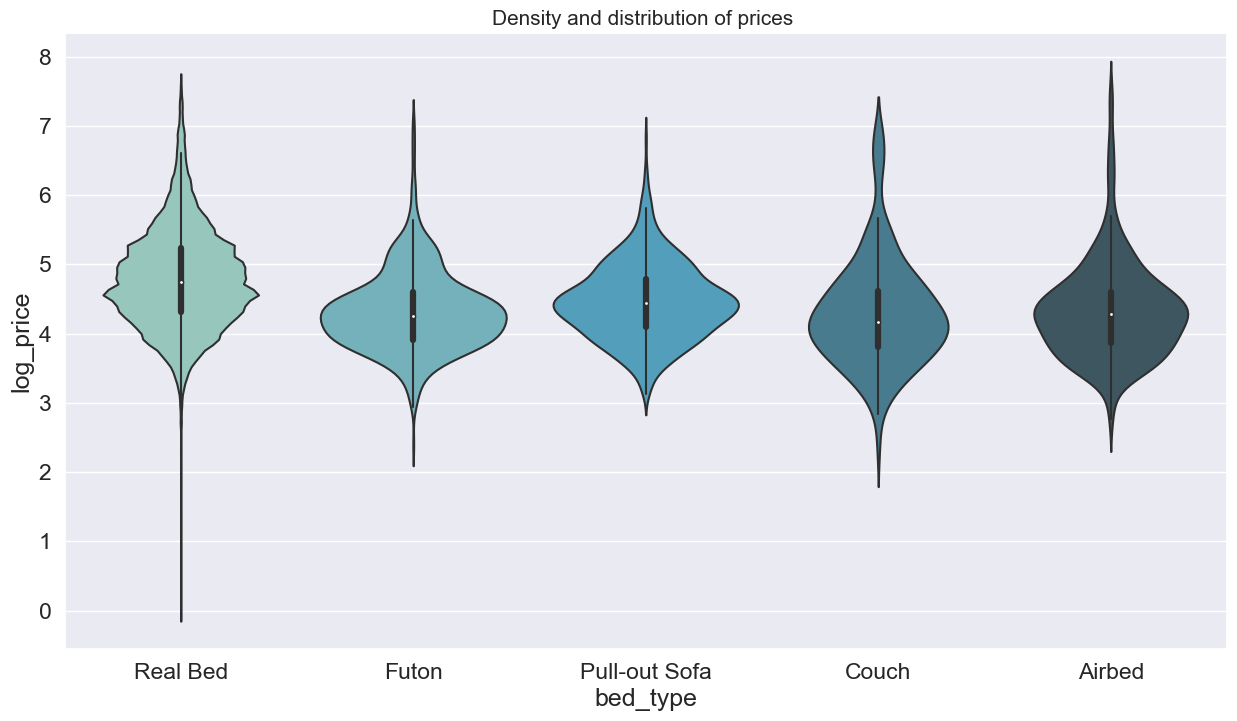

In [45]:
plot_violinplot("bed_type","log_price")

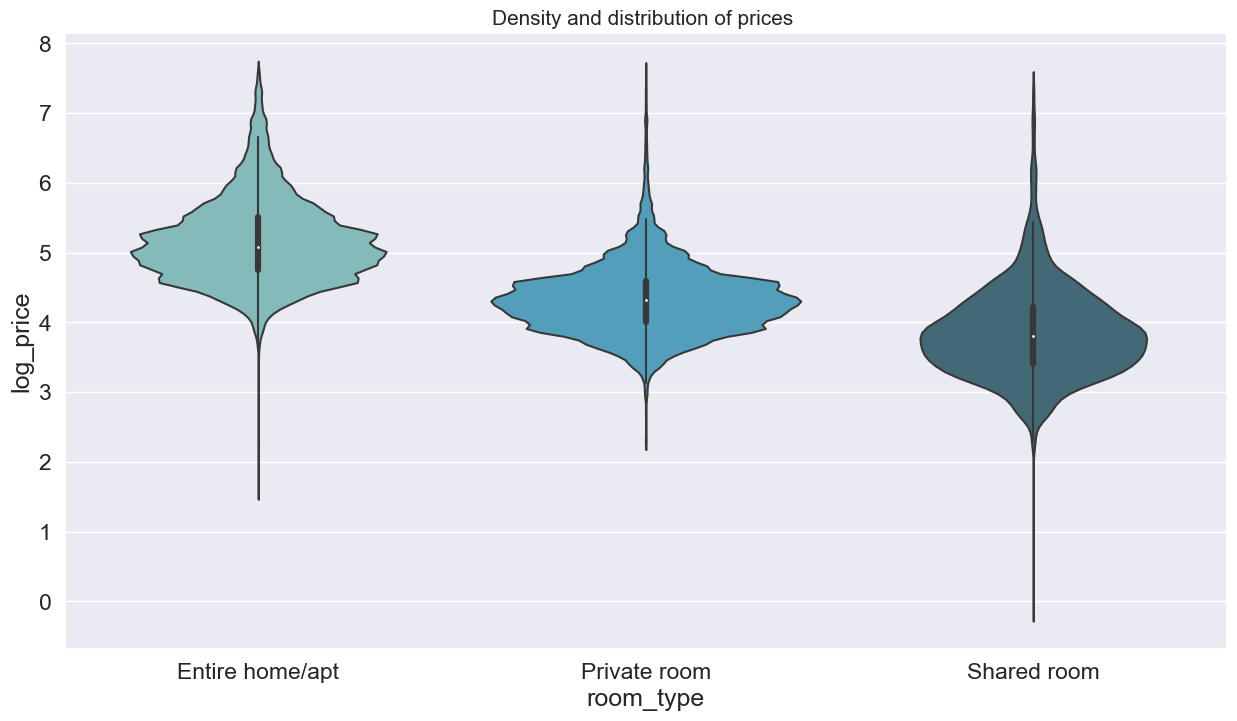

In [46]:
plot_violinplot("room_type","log_price")

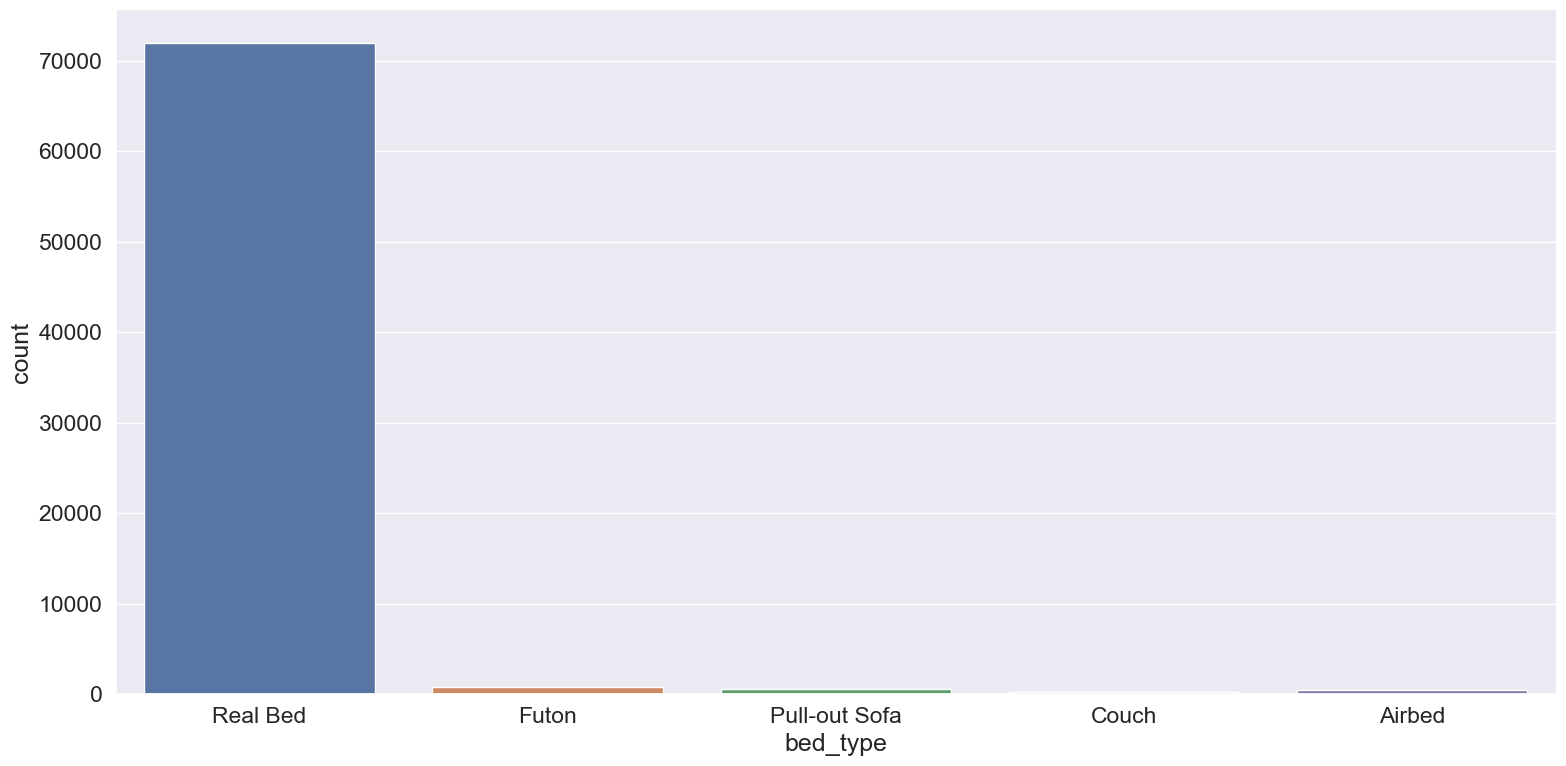

In [47]:
plot_catplot("bed_type","count",8, 2)

In [48]:
categorical_col = []
for column in df.columns:
    
    if df[column].dtypes != "float64" and df[column].dtypes != "int64":
        categorical_col.append(column)

In [49]:
categorical_col

['property_type',
 'room_type',
 'bed_type',
 'cancellation_policy',
 'cleaning_fee',
 'city',
 'description',
 'first_review',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate',
 'host_since',
 'instant_bookable',
 'last_review',
 'name',
 'neighbourhood',
 'thumbnail_url',
 'zipcode']

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_col:
    df[col] = le.fit_transform(df[col])

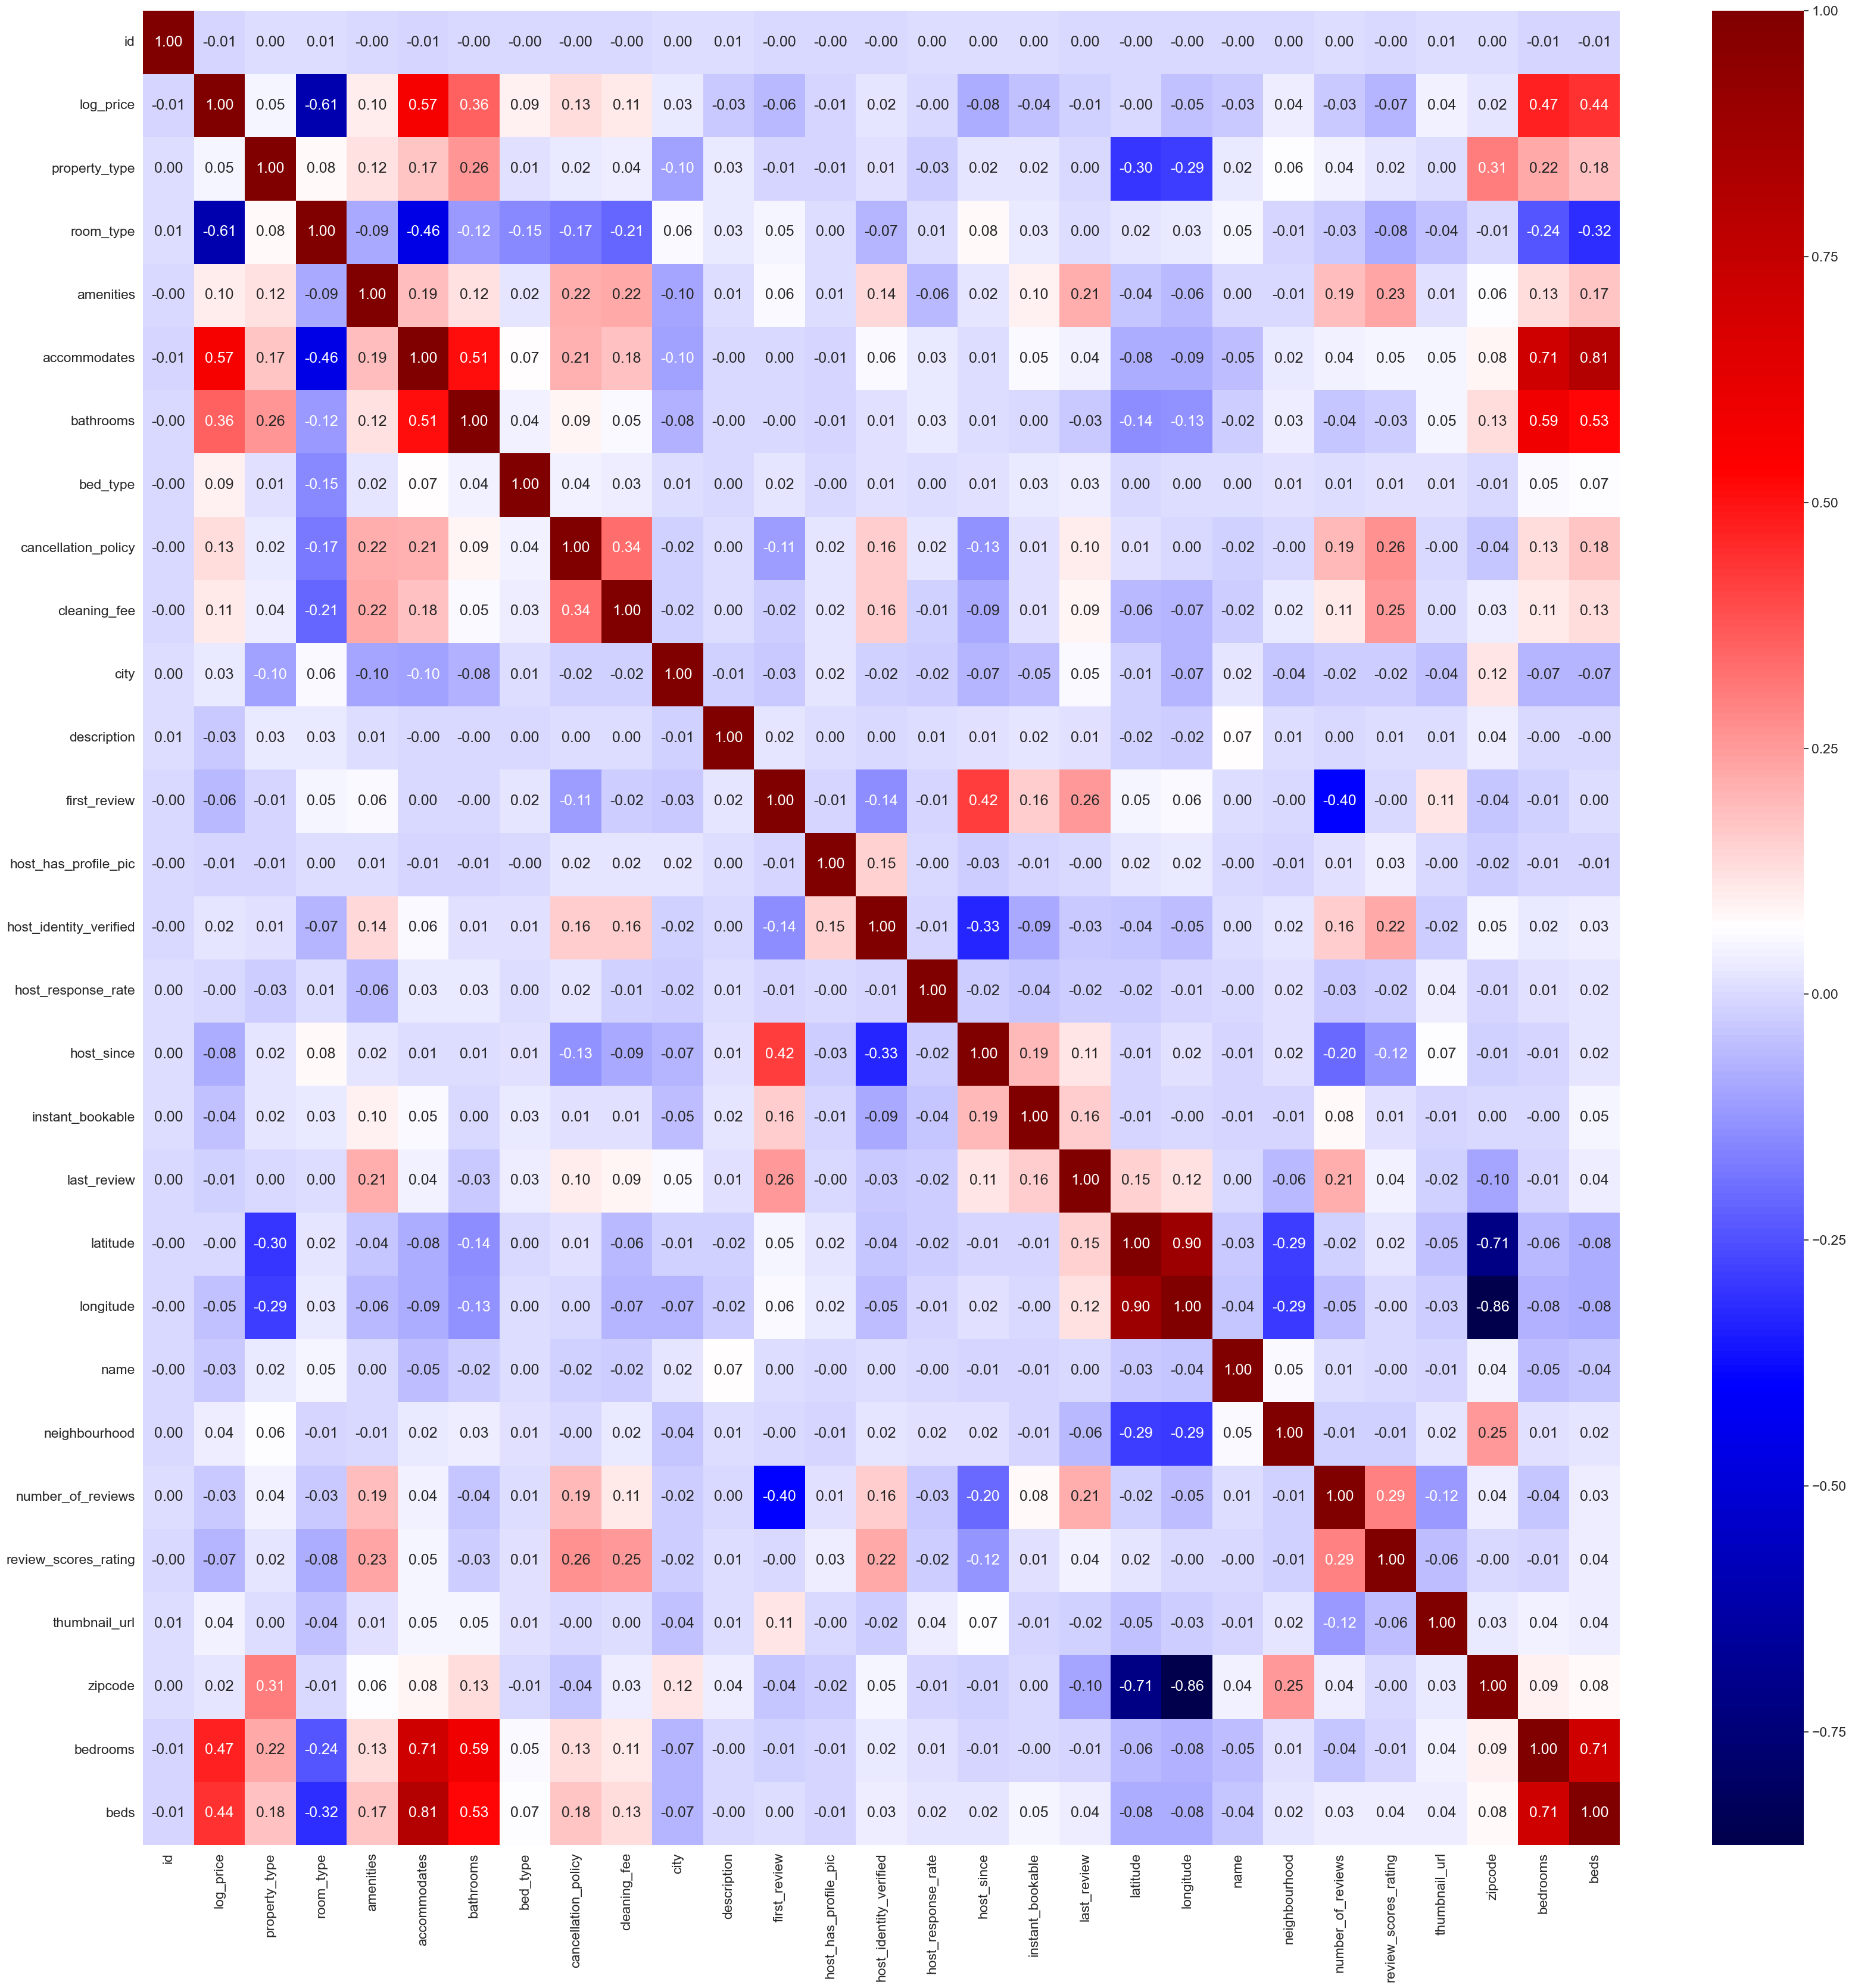

In [51]:
plt.figure(figsize = (40,40))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="seismic")
plt.show()

In [52]:
x = df.drop(["id","name","log_price","description","first_review","host_since","last_review","neighbourhood",
            "thumbnail_url","zipcode"],axis = 1)
y = df.log_price

In [53]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [54]:
lr = LinearRegression()  # Add parentheses to instantiate the LinearRegression object
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
mae_lr = metrics.mean_absolute_error(y_test, y_pred_lr)
mse_lr = metrics.mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))
r2_lr = metrics.r2_score(y_test, y_pred_lr)


print('\nMean Absolute Error of Linear Regression     : ', mae_lr)
print('\nMean Squarred Error of Linear Regression     : ', mse_lr)
print('\nRoot Mean Squarred Error of Linear Regression: ', rmse_lr)
print('\nR2 Score of Linear Regression                : ', r2_lr)


Mean Absolute Error of Linear Regression     :  0.36871839808369117

Mean Squarred Error of Linear Regression     :  0.23497242620914632

Root Mean Squarred Error of Linear Regression:  0.48473954471359804

R2 Score of Linear Regression                :  0.5462763039616023


In [55]:
rf = RandomForestRegressor()

rf.fit(x_train,y_train)

y_pred_rf = rf.predict(x_test)

mae_rf = metrics.mean_absolute_error(y_test, y_pred_rf)
mse_rf = metrics.mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
r2_rf = metrics.r2_score(y_test, y_pred_rf)


print('\nMean Absolute Error of Random Forest Regressor     : ', mae_rf)
print('\nMean Squarred Error of Random Forest Regressor     : ', mse_rf)
print('\nRoot Mean Squarred Error of Random Forest Regressor: ', rmse_rf)
print('\nR2 Score of Random Forest Regressor                : ', r2_rf)


Mean Absolute Error of Random Forest Regressor     :  0.28490153164623105

Mean Squarred Error of Random Forest Regressor     :  0.15609250462701543

Root Mean Squarred Error of Random Forest Regressor:  0.39508543965453274

R2 Score of Random Forest Regressor                :  0.698590727151017


In [56]:
from sklearn.linear_model import Ridge
model = Pipeline([
    ('poly', PolynomialFeatures()),
    ('ridge', Ridge(fit_intercept=True))
])

param_grid = {
    'poly__degree': [1, 2, 3],
    'ridge__alpha': [0.1, 0.5, 1.0, 2.0]
}

# Perform grid search with 5-fold cross-validation

poly_tuned = GridSearchCV(model, param_grid, cv=5)

#Traning and Testing

poly_tuned.fit(x_train, y_train)

y_pred_poly = poly_tuned.predict(x_test)


mae_poly  = metrics.mean_absolute_error(y_test, y_pred_poly)
mse_poly  = metrics.mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly))
r2_poly   = metrics.r2_score(y_test, y_pred_poly)


print('\nMean Absolute Error of Polynomial Regression     : ', mae_poly)
print('\nMean Squarred Error of Polynomial Regression     : ', mse_poly)
print('\nRoot Mean Squarred Error of Polynomial Regression: ', rmse_poly)
print('\nR2 Score of Polynomial Regression                : ', r2_poly)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.72953e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.6217e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.49244e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.96384e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning


Mean Absolute Error of Polynomial Regression     :  0.34212603677444775

Mean Squarred Error of Polynomial Regression     :  0.2037105088328172

Root Mean Squarred Error of Polynomial Regression:  0.4513430057426582

R2 Score of Polynomial Regression                :  0.6066419942090606


In [57]:
model_CBR = CatBoostRegressor()

model_CBR.fit(x_train, y_train)

cross_val_score(model_CBR, x_train, y_train,
                           scoring='r2',
                           cv=KFold(n_splits=5,
                                    shuffle=True,
                                    random_state=2022,
                                    ))

y_pred_cbr = model_CBR.predict(x_test)

mae_cbr  = metrics.mean_absolute_error(y_test, y_pred_cbr)
mse_cbr  = metrics.mean_squared_error(y_test, y_pred_cbr)
rmse_cbr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_cbr))
r2_cbr   = metrics.r2_score(y_test, y_pred_cbr)


print('\nMean Absolute Error of CatBoost Regressor     : ', mae_cbr)
print('\nMean Squarred Error of CatBoost Regressor     : ', mse_cbr)
print('\nRoot Mean Squarred Error of CatBoost Regressor: ', rmse_cbr)
print('\nR2 Score of CatBoost Regressor                : ', r2_cbr)

Learning rate set to 0.078038
0:	learn: 0.6884814	total: 189ms	remaining: 3m 9s
1:	learn: 0.6629188	total: 200ms	remaining: 1m 40s
2:	learn: 0.6397968	total: 213ms	remaining: 1m 10s
3:	learn: 0.6197053	total: 226ms	remaining: 56.3s
4:	learn: 0.6022100	total: 236ms	remaining: 47s
5:	learn: 0.5867609	total: 248ms	remaining: 41s
6:	learn: 0.5716923	total: 262ms	remaining: 37.2s
7:	learn: 0.5592553	total: 273ms	remaining: 33.9s
8:	learn: 0.5475392	total: 283ms	remaining: 31.2s
9:	learn: 0.5373710	total: 294ms	remaining: 29.1s
10:	learn: 0.5274211	total: 307ms	remaining: 27.6s
11:	learn: 0.5182308	total: 318ms	remaining: 26.2s
12:	learn: 0.5107779	total: 330ms	remaining: 25s
13:	learn: 0.5038525	total: 342ms	remaining: 24.1s
14:	learn: 0.4975683	total: 351ms	remaining: 23s
15:	learn: 0.4914023	total: 360ms	remaining: 22.2s
16:	learn: 0.4865003	total: 370ms	remaining: 21.4s
17:	learn: 0.4820088	total: 379ms	remaining: 20.7s
18:	learn: 0.4773001	total: 388ms	remaining: 20s
19:	learn: 0.473885

170:	learn: 0.3961221	total: 2.09s	remaining: 10.1s
171:	learn: 0.3959586	total: 2.1s	remaining: 10.1s
172:	learn: 0.3958882	total: 2.11s	remaining: 10.1s
173:	learn: 0.3957882	total: 2.13s	remaining: 10.1s
174:	learn: 0.3957002	total: 2.14s	remaining: 10.1s
175:	learn: 0.3956035	total: 2.16s	remaining: 10.1s
176:	learn: 0.3955111	total: 2.17s	remaining: 10.1s
177:	learn: 0.3953589	total: 2.19s	remaining: 10.1s
178:	learn: 0.3952499	total: 2.2s	remaining: 10.1s
179:	learn: 0.3950749	total: 2.21s	remaining: 10.1s
180:	learn: 0.3950074	total: 2.22s	remaining: 10.1s
181:	learn: 0.3948738	total: 2.24s	remaining: 10.1s
182:	learn: 0.3947430	total: 2.25s	remaining: 10s
183:	learn: 0.3946265	total: 2.26s	remaining: 10s
184:	learn: 0.3945199	total: 2.27s	remaining: 10s
185:	learn: 0.3944276	total: 2.28s	remaining: 9.99s
186:	learn: 0.3942936	total: 2.29s	remaining: 9.97s
187:	learn: 0.3941810	total: 2.3s	remaining: 9.95s
188:	learn: 0.3940343	total: 2.32s	remaining: 9.95s
189:	learn: 0.3939423

329:	learn: 0.3821258	total: 3.55s	remaining: 7.2s
330:	learn: 0.3820828	total: 3.56s	remaining: 7.18s
331:	learn: 0.3820422	total: 3.56s	remaining: 7.17s
332:	learn: 0.3819761	total: 3.57s	remaining: 7.16s
333:	learn: 0.3818891	total: 3.58s	remaining: 7.14s
334:	learn: 0.3818388	total: 3.59s	remaining: 7.12s
335:	learn: 0.3817789	total: 3.6s	remaining: 7.11s
336:	learn: 0.3817448	total: 3.61s	remaining: 7.09s
337:	learn: 0.3816788	total: 3.62s	remaining: 7.08s
338:	learn: 0.3816197	total: 3.62s	remaining: 7.07s
339:	learn: 0.3815520	total: 3.63s	remaining: 7.05s
340:	learn: 0.3815077	total: 3.64s	remaining: 7.04s
341:	learn: 0.3814566	total: 3.65s	remaining: 7.02s
342:	learn: 0.3814132	total: 3.66s	remaining: 7s
343:	learn: 0.3813526	total: 3.67s	remaining: 6.99s
344:	learn: 0.3812986	total: 3.67s	remaining: 6.98s
345:	learn: 0.3812192	total: 3.68s	remaining: 6.96s
346:	learn: 0.3811601	total: 3.69s	remaining: 6.95s
347:	learn: 0.3811076	total: 3.7s	remaining: 6.93s
348:	learn: 0.3810

493:	learn: 0.3744105	total: 5.03s	remaining: 5.16s
494:	learn: 0.3743801	total: 5.05s	remaining: 5.15s
495:	learn: 0.3743323	total: 5.06s	remaining: 5.14s
496:	learn: 0.3742933	total: 5.07s	remaining: 5.13s
497:	learn: 0.3742614	total: 5.08s	remaining: 5.12s
498:	learn: 0.3742277	total: 5.09s	remaining: 5.11s
499:	learn: 0.3741684	total: 5.11s	remaining: 5.11s
500:	learn: 0.3741471	total: 5.12s	remaining: 5.1s
501:	learn: 0.3741134	total: 5.13s	remaining: 5.09s
502:	learn: 0.3740934	total: 5.15s	remaining: 5.08s
503:	learn: 0.3740465	total: 5.16s	remaining: 5.08s
504:	learn: 0.3739930	total: 5.18s	remaining: 5.08s
505:	learn: 0.3739283	total: 5.19s	remaining: 5.07s
506:	learn: 0.3738746	total: 5.21s	remaining: 5.07s
507:	learn: 0.3738177	total: 5.23s	remaining: 5.06s
508:	learn: 0.3737724	total: 5.24s	remaining: 5.06s
509:	learn: 0.3737306	total: 5.26s	remaining: 5.05s
510:	learn: 0.3737110	total: 5.27s	remaining: 5.04s
511:	learn: 0.3736876	total: 5.28s	remaining: 5.04s
512:	learn: 0

664:	learn: 0.3682402	total: 7.44s	remaining: 3.75s
665:	learn: 0.3681925	total: 7.45s	remaining: 3.74s
666:	learn: 0.3681705	total: 7.47s	remaining: 3.73s
667:	learn: 0.3681249	total: 7.48s	remaining: 3.72s
668:	learn: 0.3680975	total: 7.51s	remaining: 3.71s
669:	learn: 0.3680681	total: 7.53s	remaining: 3.71s
670:	learn: 0.3680467	total: 7.54s	remaining: 3.7s
671:	learn: 0.3680297	total: 7.56s	remaining: 3.69s
672:	learn: 0.3679965	total: 7.58s	remaining: 3.68s
673:	learn: 0.3679604	total: 7.59s	remaining: 3.67s
674:	learn: 0.3679119	total: 7.62s	remaining: 3.67s
675:	learn: 0.3678579	total: 7.63s	remaining: 3.66s
676:	learn: 0.3678230	total: 7.65s	remaining: 3.65s
677:	learn: 0.3677923	total: 7.67s	remaining: 3.64s
678:	learn: 0.3677629	total: 7.68s	remaining: 3.63s
679:	learn: 0.3677283	total: 7.7s	remaining: 3.62s
680:	learn: 0.3676785	total: 7.72s	remaining: 3.62s
681:	learn: 0.3676441	total: 7.73s	remaining: 3.6s
682:	learn: 0.3676066	total: 7.74s	remaining: 3.59s
683:	learn: 0.3

827:	learn: 0.3633273	total: 9.55s	remaining: 1.98s
828:	learn: 0.3632859	total: 9.56s	remaining: 1.97s
829:	learn: 0.3632680	total: 9.57s	remaining: 1.96s
830:	learn: 0.3632326	total: 9.58s	remaining: 1.95s
831:	learn: 0.3632193	total: 9.59s	remaining: 1.94s
832:	learn: 0.3632019	total: 9.6s	remaining: 1.93s
833:	learn: 0.3631719	total: 9.62s	remaining: 1.91s
834:	learn: 0.3631578	total: 9.63s	remaining: 1.9s
835:	learn: 0.3631270	total: 9.64s	remaining: 1.89s
836:	learn: 0.3631088	total: 9.65s	remaining: 1.88s
837:	learn: 0.3630729	total: 9.66s	remaining: 1.87s
838:	learn: 0.3630379	total: 9.68s	remaining: 1.86s
839:	learn: 0.3630112	total: 9.69s	remaining: 1.84s
840:	learn: 0.3629841	total: 9.7s	remaining: 1.83s
841:	learn: 0.3629540	total: 9.71s	remaining: 1.82s
842:	learn: 0.3629240	total: 9.72s	remaining: 1.81s
843:	learn: 0.3628903	total: 9.74s	remaining: 1.8s
844:	learn: 0.3628739	total: 9.75s	remaining: 1.79s
845:	learn: 0.3628465	total: 9.76s	remaining: 1.78s
846:	learn: 0.36

999:	learn: 0.3586790	total: 11.5s	remaining: 0us
Learning rate set to 0.075335
0:	learn: 0.6906169	total: 9.34ms	remaining: 9.33s
1:	learn: 0.6658759	total: 17ms	remaining: 8.48s
2:	learn: 0.6437199	total: 27.1ms	remaining: 9.01s
3:	learn: 0.6240543	total: 34ms	remaining: 8.46s
4:	learn: 0.6068497	total: 44ms	remaining: 8.75s
5:	learn: 0.5916261	total: 51.1ms	remaining: 8.47s
6:	learn: 0.5767661	total: 59.1ms	remaining: 8.38s
7:	learn: 0.5644822	total: 66.7ms	remaining: 8.27s
8:	learn: 0.5527651	total: 74.9ms	remaining: 8.25s
9:	learn: 0.5427994	total: 82.4ms	remaining: 8.16s
10:	learn: 0.5332057	total: 92.8ms	remaining: 8.34s
11:	learn: 0.5237542	total: 101ms	remaining: 8.3s
12:	learn: 0.5163785	total: 111ms	remaining: 8.46s
13:	learn: 0.5094974	total: 119ms	remaining: 8.41s
14:	learn: 0.5029246	total: 128ms	remaining: 8.41s
15:	learn: 0.4965713	total: 139ms	remaining: 8.55s
16:	learn: 0.4914837	total: 147ms	remaining: 8.49s
17:	learn: 0.4869573	total: 163ms	remaining: 8.88s
18:	lear

163:	learn: 0.3991935	total: 1.6s	remaining: 8.18s
164:	learn: 0.3990456	total: 1.61s	remaining: 8.16s
165:	learn: 0.3989183	total: 1.62s	remaining: 8.16s
166:	learn: 0.3987982	total: 1.63s	remaining: 8.15s
167:	learn: 0.3985318	total: 1.64s	remaining: 8.14s
168:	learn: 0.3983792	total: 1.66s	remaining: 8.15s
169:	learn: 0.3982221	total: 1.67s	remaining: 8.15s
170:	learn: 0.3981143	total: 1.68s	remaining: 8.15s
171:	learn: 0.3979488	total: 1.72s	remaining: 8.27s
172:	learn: 0.3977670	total: 1.73s	remaining: 8.27s
173:	learn: 0.3976215	total: 1.75s	remaining: 8.29s
174:	learn: 0.3974662	total: 1.77s	remaining: 8.33s
175:	learn: 0.3973609	total: 1.78s	remaining: 8.35s
176:	learn: 0.3972035	total: 1.8s	remaining: 8.35s
177:	learn: 0.3970470	total: 1.81s	remaining: 8.35s
178:	learn: 0.3968406	total: 1.83s	remaining: 8.38s
179:	learn: 0.3967188	total: 1.85s	remaining: 8.41s
180:	learn: 0.3966156	total: 1.86s	remaining: 8.43s
181:	learn: 0.3964852	total: 1.88s	remaining: 8.45s
182:	learn: 0.

325:	learn: 0.3835792	total: 3.5s	remaining: 7.23s
326:	learn: 0.3835470	total: 3.5s	remaining: 7.21s
327:	learn: 0.3835073	total: 3.51s	remaining: 7.19s
328:	learn: 0.3834727	total: 3.52s	remaining: 7.18s
329:	learn: 0.3833637	total: 3.53s	remaining: 7.16s
330:	learn: 0.3833007	total: 3.54s	remaining: 7.14s
331:	learn: 0.3832497	total: 3.54s	remaining: 7.13s
332:	learn: 0.3832039	total: 3.55s	remaining: 7.11s
333:	learn: 0.3831405	total: 3.56s	remaining: 7.09s
334:	learn: 0.3830951	total: 3.56s	remaining: 7.07s
335:	learn: 0.3830338	total: 3.57s	remaining: 7.06s
336:	learn: 0.3829643	total: 3.58s	remaining: 7.04s
337:	learn: 0.3829174	total: 3.58s	remaining: 7.02s
338:	learn: 0.3828252	total: 3.59s	remaining: 7s
339:	learn: 0.3828061	total: 3.6s	remaining: 6.99s
340:	learn: 0.3827279	total: 3.61s	remaining: 6.97s
341:	learn: 0.3826825	total: 3.61s	remaining: 6.95s
342:	learn: 0.3826261	total: 3.62s	remaining: 6.93s
343:	learn: 0.3825820	total: 3.63s	remaining: 6.92s
344:	learn: 0.3825

497:	learn: 0.3750871	total: 5.42s	remaining: 5.46s
498:	learn: 0.3750584	total: 5.42s	remaining: 5.45s
499:	learn: 0.3750238	total: 5.43s	remaining: 5.43s
500:	learn: 0.3749906	total: 5.44s	remaining: 5.42s
501:	learn: 0.3749504	total: 5.44s	remaining: 5.4s
502:	learn: 0.3749099	total: 5.45s	remaining: 5.39s
503:	learn: 0.3748681	total: 5.46s	remaining: 5.37s
504:	learn: 0.3748015	total: 5.47s	remaining: 5.36s
505:	learn: 0.3747183	total: 5.47s	remaining: 5.34s
506:	learn: 0.3746843	total: 5.48s	remaining: 5.33s
507:	learn: 0.3746569	total: 5.49s	remaining: 5.32s
508:	learn: 0.3746089	total: 5.5s	remaining: 5.3s
509:	learn: 0.3745399	total: 5.5s	remaining: 5.29s
510:	learn: 0.3744840	total: 5.51s	remaining: 5.28s
511:	learn: 0.3744416	total: 5.52s	remaining: 5.26s
512:	learn: 0.3744132	total: 5.53s	remaining: 5.25s
513:	learn: 0.3743734	total: 5.53s	remaining: 5.23s
514:	learn: 0.3743290	total: 5.54s	remaining: 5.22s
515:	learn: 0.3743005	total: 5.55s	remaining: 5.2s
516:	learn: 0.374

656:	learn: 0.3687772	total: 6.92s	remaining: 3.61s
657:	learn: 0.3687294	total: 6.94s	remaining: 3.61s
658:	learn: 0.3686790	total: 6.96s	remaining: 3.6s
659:	learn: 0.3686410	total: 6.98s	remaining: 3.59s
660:	learn: 0.3686301	total: 6.99s	remaining: 3.58s
661:	learn: 0.3686254	total: 7.01s	remaining: 3.58s
662:	learn: 0.3685715	total: 7.03s	remaining: 3.57s
663:	learn: 0.3685284	total: 7.05s	remaining: 3.56s
664:	learn: 0.3684962	total: 7.06s	remaining: 3.56s
665:	learn: 0.3684790	total: 7.08s	remaining: 3.55s
666:	learn: 0.3684563	total: 7.09s	remaining: 3.54s
667:	learn: 0.3684261	total: 7.11s	remaining: 3.53s
668:	learn: 0.3683939	total: 7.12s	remaining: 3.52s
669:	learn: 0.3683125	total: 7.13s	remaining: 3.51s
670:	learn: 0.3682468	total: 7.14s	remaining: 3.5s
671:	learn: 0.3682046	total: 7.15s	remaining: 3.49s
672:	learn: 0.3681641	total: 7.16s	remaining: 3.48s
673:	learn: 0.3681250	total: 7.16s	remaining: 3.46s
674:	learn: 0.3680874	total: 7.17s	remaining: 3.45s
675:	learn: 0.

834:	learn: 0.3630173	total: 8.37s	remaining: 1.65s
835:	learn: 0.3629716	total: 8.37s	remaining: 1.64s
836:	learn: 0.3629347	total: 8.38s	remaining: 1.63s
837:	learn: 0.3629024	total: 8.39s	remaining: 1.62s
838:	learn: 0.3628630	total: 8.4s	remaining: 1.61s
839:	learn: 0.3628073	total: 8.41s	remaining: 1.6s
840:	learn: 0.3627840	total: 8.43s	remaining: 1.59s
841:	learn: 0.3627710	total: 8.43s	remaining: 1.58s
842:	learn: 0.3627557	total: 8.44s	remaining: 1.57s
843:	learn: 0.3627285	total: 8.45s	remaining: 1.56s
844:	learn: 0.3626889	total: 8.45s	remaining: 1.55s
845:	learn: 0.3626255	total: 8.46s	remaining: 1.54s
846:	learn: 0.3626056	total: 8.47s	remaining: 1.53s
847:	learn: 0.3625659	total: 8.48s	remaining: 1.52s
848:	learn: 0.3624928	total: 8.49s	remaining: 1.51s
849:	learn: 0.3624461	total: 8.49s	remaining: 1.5s
850:	learn: 0.3624051	total: 8.5s	remaining: 1.49s
851:	learn: 0.3623786	total: 8.51s	remaining: 1.48s
852:	learn: 0.3623570	total: 8.52s	remaining: 1.47s
853:	learn: 0.36

Learning rate set to 0.075335
0:	learn: 0.6875970	total: 10.6ms	remaining: 10.6s
1:	learn: 0.6630409	total: 19.7ms	remaining: 9.85s
2:	learn: 0.6409756	total: 29.9ms	remaining: 9.95s
3:	learn: 0.6213906	total: 39.4ms	remaining: 9.81s
4:	learn: 0.6043628	total: 48.7ms	remaining: 9.68s
5:	learn: 0.5892576	total: 58ms	remaining: 9.62s
6:	learn: 0.5743557	total: 67.4ms	remaining: 9.56s
7:	learn: 0.5621800	total: 76.5ms	remaining: 9.49s
8:	learn: 0.5504533	total: 86.1ms	remaining: 9.48s
9:	learn: 0.5402180	total: 95.5ms	remaining: 9.46s
10:	learn: 0.5307123	total: 105ms	remaining: 9.43s
11:	learn: 0.5216215	total: 115ms	remaining: 9.46s
12:	learn: 0.5142198	total: 125ms	remaining: 9.49s
13:	learn: 0.5065022	total: 134ms	remaining: 9.47s
14:	learn: 0.4998432	total: 144ms	remaining: 9.45s
15:	learn: 0.4937780	total: 154ms	remaining: 9.46s
16:	learn: 0.4881382	total: 164ms	remaining: 9.46s
17:	learn: 0.4833670	total: 173ms	remaining: 9.43s
18:	learn: 0.4789017	total: 182ms	remaining: 9.4s
19:	

162:	learn: 0.3959757	total: 1.69s	remaining: 8.7s
163:	learn: 0.3958260	total: 1.7s	remaining: 8.69s
164:	learn: 0.3956547	total: 1.72s	remaining: 8.68s
165:	learn: 0.3955430	total: 1.73s	remaining: 8.68s
166:	learn: 0.3954193	total: 1.74s	remaining: 8.67s
167:	learn: 0.3952135	total: 1.75s	remaining: 8.66s
168:	learn: 0.3951245	total: 1.76s	remaining: 8.65s
169:	learn: 0.3950121	total: 1.77s	remaining: 8.64s
170:	learn: 0.3948798	total: 1.78s	remaining: 8.62s
171:	learn: 0.3947020	total: 1.79s	remaining: 8.61s
172:	learn: 0.3945372	total: 1.8s	remaining: 8.61s
173:	learn: 0.3944151	total: 1.81s	remaining: 8.6s
174:	learn: 0.3942635	total: 1.83s	remaining: 8.61s
175:	learn: 0.3941151	total: 1.84s	remaining: 8.61s
176:	learn: 0.3939167	total: 1.85s	remaining: 8.61s
177:	learn: 0.3937559	total: 1.86s	remaining: 8.59s
178:	learn: 0.3936222	total: 1.87s	remaining: 8.58s
179:	learn: 0.3934671	total: 1.88s	remaining: 8.57s
180:	learn: 0.3932934	total: 1.89s	remaining: 8.55s
181:	learn: 0.39

327:	learn: 0.3801305	total: 3.36s	remaining: 6.88s
328:	learn: 0.3800972	total: 3.37s	remaining: 6.87s
329:	learn: 0.3800692	total: 3.38s	remaining: 6.86s
330:	learn: 0.3800209	total: 3.38s	remaining: 6.84s
331:	learn: 0.3799650	total: 3.39s	remaining: 6.83s
332:	learn: 0.3799105	total: 3.4s	remaining: 6.82s
333:	learn: 0.3798507	total: 3.41s	remaining: 6.8s
334:	learn: 0.3797921	total: 3.42s	remaining: 6.79s
335:	learn: 0.3796999	total: 3.43s	remaining: 6.78s
336:	learn: 0.3796718	total: 3.44s	remaining: 6.77s
337:	learn: 0.3796172	total: 3.45s	remaining: 6.76s
338:	learn: 0.3795780	total: 3.46s	remaining: 6.75s
339:	learn: 0.3795059	total: 3.47s	remaining: 6.74s
340:	learn: 0.3794312	total: 3.48s	remaining: 6.73s
341:	learn: 0.3793805	total: 3.49s	remaining: 6.72s
342:	learn: 0.3793309	total: 3.5s	remaining: 6.71s
343:	learn: 0.3792696	total: 3.51s	remaining: 6.7s
344:	learn: 0.3791986	total: 3.52s	remaining: 6.68s
345:	learn: 0.3791416	total: 3.53s	remaining: 6.67s
346:	learn: 0.37

490:	learn: 0.3715242	total: 4.82s	remaining: 5s
491:	learn: 0.3714899	total: 4.83s	remaining: 4.99s
492:	learn: 0.3714405	total: 4.84s	remaining: 4.98s
493:	learn: 0.3713815	total: 4.85s	remaining: 4.96s
494:	learn: 0.3713598	total: 4.85s	remaining: 4.95s
495:	learn: 0.3713208	total: 4.86s	remaining: 4.94s
496:	learn: 0.3712861	total: 4.87s	remaining: 4.93s
497:	learn: 0.3712273	total: 4.88s	remaining: 4.92s
498:	learn: 0.3711941	total: 4.89s	remaining: 4.91s
499:	learn: 0.3711544	total: 4.89s	remaining: 4.89s
500:	learn: 0.3711069	total: 4.9s	remaining: 4.88s
501:	learn: 0.3710692	total: 4.91s	remaining: 4.87s
502:	learn: 0.3710130	total: 4.92s	remaining: 4.86s
503:	learn: 0.3709763	total: 4.93s	remaining: 4.85s
504:	learn: 0.3709324	total: 4.94s	remaining: 4.84s
505:	learn: 0.3708784	total: 4.95s	remaining: 4.83s
506:	learn: 0.3708556	total: 4.96s	remaining: 4.83s
507:	learn: 0.3708289	total: 4.97s	remaining: 4.82s
508:	learn: 0.3707969	total: 4.98s	remaining: 4.8s
509:	learn: 0.370

651:	learn: 0.3648709	total: 6.07s	remaining: 3.24s
652:	learn: 0.3648500	total: 6.07s	remaining: 3.23s
653:	learn: 0.3648247	total: 6.08s	remaining: 3.22s
654:	learn: 0.3648063	total: 6.09s	remaining: 3.21s
655:	learn: 0.3647528	total: 6.1s	remaining: 3.2s
656:	learn: 0.3647191	total: 6.1s	remaining: 3.19s
657:	learn: 0.3646628	total: 6.11s	remaining: 3.18s
658:	learn: 0.3646201	total: 6.12s	remaining: 3.17s
659:	learn: 0.3645758	total: 6.13s	remaining: 3.16s
660:	learn: 0.3645565	total: 6.13s	remaining: 3.15s
661:	learn: 0.3645299	total: 6.14s	remaining: 3.13s
662:	learn: 0.3644930	total: 6.15s	remaining: 3.13s
663:	learn: 0.3644520	total: 6.16s	remaining: 3.12s
664:	learn: 0.3644028	total: 6.16s	remaining: 3.1s
665:	learn: 0.3643590	total: 6.17s	remaining: 3.09s
666:	learn: 0.3643066	total: 6.18s	remaining: 3.08s
667:	learn: 0.3642634	total: 6.19s	remaining: 3.07s
668:	learn: 0.3642335	total: 6.19s	remaining: 3.06s
669:	learn: 0.3641695	total: 6.2s	remaining: 3.05s
670:	learn: 0.364

826:	learn: 0.3586609	total: 7.55s	remaining: 1.58s
827:	learn: 0.3586391	total: 7.56s	remaining: 1.57s
828:	learn: 0.3586032	total: 7.57s	remaining: 1.56s
829:	learn: 0.3585826	total: 7.58s	remaining: 1.55s
830:	learn: 0.3585576	total: 7.59s	remaining: 1.54s
831:	learn: 0.3585373	total: 7.6s	remaining: 1.53s
832:	learn: 0.3584951	total: 7.6s	remaining: 1.52s
833:	learn: 0.3584726	total: 7.61s	remaining: 1.51s
834:	learn: 0.3584453	total: 7.62s	remaining: 1.5s
835:	learn: 0.3584237	total: 7.63s	remaining: 1.5s
836:	learn: 0.3583872	total: 7.64s	remaining: 1.49s
837:	learn: 0.3583680	total: 7.64s	remaining: 1.48s
838:	learn: 0.3583473	total: 7.65s	remaining: 1.47s
839:	learn: 0.3583039	total: 7.66s	remaining: 1.46s
840:	learn: 0.3582777	total: 7.67s	remaining: 1.45s
841:	learn: 0.3582282	total: 7.67s	remaining: 1.44s
842:	learn: 0.3581930	total: 7.68s	remaining: 1.43s
843:	learn: 0.3581551	total: 7.69s	remaining: 1.42s
844:	learn: 0.3581212	total: 7.7s	remaining: 1.41s
845:	learn: 0.358

996:	learn: 0.3537226	total: 9.73s	remaining: 29.3ms
997:	learn: 0.3536791	total: 9.75s	remaining: 19.5ms
998:	learn: 0.3536538	total: 9.76s	remaining: 9.77ms
999:	learn: 0.3536384	total: 9.77s	remaining: 0us
Learning rate set to 0.075335
0:	learn: 0.6891208	total: 12.1ms	remaining: 12.1s
1:	learn: 0.6644106	total: 23.9ms	remaining: 11.9s
2:	learn: 0.6422634	total: 36ms	remaining: 12s
3:	learn: 0.6226969	total: 45.6ms	remaining: 11.4s
4:	learn: 0.6055651	total: 54.5ms	remaining: 10.8s
5:	learn: 0.5902243	total: 64.7ms	remaining: 10.7s
6:	learn: 0.5752142	total: 76.3ms	remaining: 10.8s
7:	learn: 0.5630003	total: 85.9ms	remaining: 10.7s
8:	learn: 0.5513622	total: 99.8ms	remaining: 11s
9:	learn: 0.5407329	total: 110ms	remaining: 10.8s
10:	learn: 0.5309599	total: 133ms	remaining: 12s
11:	learn: 0.5216443	total: 145ms	remaining: 12s
12:	learn: 0.5141265	total: 155ms	remaining: 11.8s
13:	learn: 0.5063990	total: 165ms	remaining: 11.7s
14:	learn: 0.5003328	total: 182ms	remaining: 12s
15:	learn

167:	learn: 0.3961535	total: 2.4s	remaining: 11.9s
168:	learn: 0.3960462	total: 2.41s	remaining: 11.9s
169:	learn: 0.3959396	total: 2.44s	remaining: 11.9s
170:	learn: 0.3957415	total: 2.45s	remaining: 11.9s
171:	learn: 0.3955262	total: 2.46s	remaining: 11.9s
172:	learn: 0.3954305	total: 2.47s	remaining: 11.8s
173:	learn: 0.3952471	total: 2.48s	remaining: 11.8s
174:	learn: 0.3950891	total: 2.49s	remaining: 11.7s
175:	learn: 0.3949559	total: 2.5s	remaining: 11.7s
176:	learn: 0.3948670	total: 2.52s	remaining: 11.7s
177:	learn: 0.3946768	total: 2.54s	remaining: 11.7s
178:	learn: 0.3945156	total: 2.57s	remaining: 11.8s
179:	learn: 0.3943654	total: 2.58s	remaining: 11.7s
180:	learn: 0.3942450	total: 2.58s	remaining: 11.7s
181:	learn: 0.3941318	total: 2.6s	remaining: 11.7s
182:	learn: 0.3939752	total: 2.61s	remaining: 11.6s
183:	learn: 0.3937809	total: 2.62s	remaining: 11.6s
184:	learn: 0.3936483	total: 2.63s	remaining: 11.6s
185:	learn: 0.3935564	total: 2.63s	remaining: 11.5s
186:	learn: 0.3

336:	learn: 0.3805217	total: 4.81s	remaining: 9.46s
337:	learn: 0.3804734	total: 4.82s	remaining: 9.45s
338:	learn: 0.3804418	total: 4.84s	remaining: 9.44s
339:	learn: 0.3803804	total: 4.86s	remaining: 9.43s
340:	learn: 0.3803443	total: 4.87s	remaining: 9.42s
341:	learn: 0.3803073	total: 4.89s	remaining: 9.41s
342:	learn: 0.3802678	total: 4.9s	remaining: 9.39s
343:	learn: 0.3802043	total: 4.93s	remaining: 9.39s
344:	learn: 0.3801172	total: 4.94s	remaining: 9.38s
345:	learn: 0.3800641	total: 4.95s	remaining: 9.36s
346:	learn: 0.3800139	total: 4.96s	remaining: 9.34s
347:	learn: 0.3799332	total: 4.98s	remaining: 9.32s
348:	learn: 0.3798374	total: 4.99s	remaining: 9.31s
349:	learn: 0.3797863	total: 5s	remaining: 9.29s
350:	learn: 0.3797410	total: 5.01s	remaining: 9.27s
351:	learn: 0.3797008	total: 5.03s	remaining: 9.26s
352:	learn: 0.3796254	total: 5.04s	remaining: 9.24s
353:	learn: 0.3795716	total: 5.06s	remaining: 9.23s
354:	learn: 0.3794819	total: 5.09s	remaining: 9.25s
355:	learn: 0.37

510:	learn: 0.3716509	total: 6.93s	remaining: 6.63s
511:	learn: 0.3715855	total: 6.94s	remaining: 6.61s
512:	learn: 0.3715187	total: 6.95s	remaining: 6.6s
513:	learn: 0.3714694	total: 6.96s	remaining: 6.58s
514:	learn: 0.3714303	total: 6.97s	remaining: 6.56s
515:	learn: 0.3713964	total: 6.98s	remaining: 6.55s
516:	learn: 0.3713656	total: 6.99s	remaining: 6.53s
517:	learn: 0.3713514	total: 7s	remaining: 6.51s
518:	learn: 0.3713293	total: 7.01s	remaining: 6.5s
519:	learn: 0.3713069	total: 7.02s	remaining: 6.48s
520:	learn: 0.3712436	total: 7.03s	remaining: 6.46s
521:	learn: 0.3712113	total: 7.04s	remaining: 6.45s
522:	learn: 0.3711904	total: 7.05s	remaining: 6.43s
523:	learn: 0.3711617	total: 7.06s	remaining: 6.41s
524:	learn: 0.3711260	total: 7.07s	remaining: 6.4s
525:	learn: 0.3711031	total: 7.08s	remaining: 6.38s
526:	learn: 0.3710556	total: 7.09s	remaining: 6.36s
527:	learn: 0.3709960	total: 7.1s	remaining: 6.35s
528:	learn: 0.3709586	total: 7.11s	remaining: 6.33s
529:	learn: 0.37091

678:	learn: 0.3651914	total: 9.06s	remaining: 4.28s
679:	learn: 0.3651427	total: 9.07s	remaining: 4.27s
680:	learn: 0.3650972	total: 9.08s	remaining: 4.25s
681:	learn: 0.3650636	total: 9.09s	remaining: 4.24s
682:	learn: 0.3650363	total: 9.1s	remaining: 4.22s
683:	learn: 0.3649797	total: 9.11s	remaining: 4.21s
684:	learn: 0.3649589	total: 9.12s	remaining: 4.19s
685:	learn: 0.3649391	total: 9.13s	remaining: 4.18s
686:	learn: 0.3649320	total: 9.14s	remaining: 4.17s
687:	learn: 0.3649017	total: 9.15s	remaining: 4.15s
688:	learn: 0.3648645	total: 9.16s	remaining: 4.13s
689:	learn: 0.3648245	total: 9.17s	remaining: 4.12s
690:	learn: 0.3648034	total: 9.18s	remaining: 4.11s
691:	learn: 0.3647688	total: 9.19s	remaining: 4.09s
692:	learn: 0.3647468	total: 9.2s	remaining: 4.08s
693:	learn: 0.3647226	total: 9.21s	remaining: 4.06s
694:	learn: 0.3646842	total: 9.22s	remaining: 4.05s
695:	learn: 0.3646350	total: 9.23s	remaining: 4.03s
696:	learn: 0.3646101	total: 9.24s	remaining: 4.02s
697:	learn: 0.

848:	learn: 0.3594729	total: 10.7s	remaining: 1.91s
849:	learn: 0.3594530	total: 10.7s	remaining: 1.9s
850:	learn: 0.3594348	total: 10.8s	remaining: 1.88s
851:	learn: 0.3594163	total: 10.8s	remaining: 1.87s
852:	learn: 0.3594025	total: 10.8s	remaining: 1.86s
853:	learn: 0.3593861	total: 10.8s	remaining: 1.84s
854:	learn: 0.3593421	total: 10.8s	remaining: 1.83s
855:	learn: 0.3593121	total: 10.8s	remaining: 1.82s
856:	learn: 0.3592948	total: 10.8s	remaining: 1.8s
857:	learn: 0.3592768	total: 10.8s	remaining: 1.79s
858:	learn: 0.3592337	total: 10.8s	remaining: 1.78s
859:	learn: 0.3592144	total: 10.8s	remaining: 1.76s
860:	learn: 0.3591879	total: 10.8s	remaining: 1.75s
861:	learn: 0.3591667	total: 10.8s	remaining: 1.74s
862:	learn: 0.3591318	total: 10.9s	remaining: 1.72s
863:	learn: 0.3591025	total: 10.9s	remaining: 1.71s
864:	learn: 0.3590670	total: 10.9s	remaining: 1.7s
865:	learn: 0.3590595	total: 10.9s	remaining: 1.68s
866:	learn: 0.3590291	total: 10.9s	remaining: 1.67s
867:	learn: 0.3

13:	learn: 0.5055571	total: 116ms	remaining: 8.19s
14:	learn: 0.4993614	total: 125ms	remaining: 8.19s
15:	learn: 0.4930116	total: 134ms	remaining: 8.25s
16:	learn: 0.4882149	total: 143ms	remaining: 8.24s
17:	learn: 0.4834724	total: 152ms	remaining: 8.29s
18:	learn: 0.4789188	total: 159ms	remaining: 8.23s
19:	learn: 0.4744763	total: 168ms	remaining: 8.23s
20:	learn: 0.4713467	total: 175ms	remaining: 8.17s
21:	learn: 0.4688468	total: 183ms	remaining: 8.14s
22:	learn: 0.4660894	total: 190ms	remaining: 8.09s
23:	learn: 0.4628146	total: 198ms	remaining: 8.05s
24:	learn: 0.4596205	total: 206ms	remaining: 8.02s
25:	learn: 0.4574582	total: 214ms	remaining: 8.01s
26:	learn: 0.4555062	total: 222ms	remaining: 8s
27:	learn: 0.4532547	total: 231ms	remaining: 8.02s
28:	learn: 0.4504756	total: 239ms	remaining: 7.99s
29:	learn: 0.4486265	total: 246ms	remaining: 7.96s
30:	learn: 0.4474081	total: 253ms	remaining: 7.91s
31:	learn: 0.4460698	total: 260ms	remaining: 7.88s
32:	learn: 0.4443151	total: 270ms	

175:	learn: 0.3937579	total: 1.39s	remaining: 6.51s
176:	learn: 0.3935273	total: 1.4s	remaining: 6.51s
177:	learn: 0.3933849	total: 1.41s	remaining: 6.5s
178:	learn: 0.3932781	total: 1.42s	remaining: 6.5s
179:	learn: 0.3931340	total: 1.43s	remaining: 6.49s
180:	learn: 0.3930004	total: 1.43s	remaining: 6.49s
181:	learn: 0.3928774	total: 1.44s	remaining: 6.47s
182:	learn: 0.3927914	total: 1.45s	remaining: 6.47s
183:	learn: 0.3926250	total: 1.46s	remaining: 6.46s
184:	learn: 0.3924151	total: 1.47s	remaining: 6.46s
185:	learn: 0.3922102	total: 1.48s	remaining: 6.46s
186:	learn: 0.3920339	total: 1.48s	remaining: 6.45s
187:	learn: 0.3919646	total: 1.49s	remaining: 6.44s
188:	learn: 0.3918547	total: 1.5s	remaining: 6.44s
189:	learn: 0.3916810	total: 1.51s	remaining: 6.43s
190:	learn: 0.3915761	total: 1.52s	remaining: 6.42s
191:	learn: 0.3914687	total: 1.52s	remaining: 6.42s
192:	learn: 0.3913809	total: 1.53s	remaining: 6.4s
193:	learn: 0.3912047	total: 1.54s	remaining: 6.4s
194:	learn: 0.3911

345:	learn: 0.3787007	total: 2.85s	remaining: 5.39s
346:	learn: 0.3786341	total: 2.86s	remaining: 5.38s
347:	learn: 0.3785746	total: 2.87s	remaining: 5.37s
348:	learn: 0.3784720	total: 2.88s	remaining: 5.36s
349:	learn: 0.3784133	total: 2.88s	remaining: 5.35s
350:	learn: 0.3783597	total: 2.89s	remaining: 5.34s
351:	learn: 0.3783090	total: 2.9s	remaining: 5.33s
352:	learn: 0.3782199	total: 2.9s	remaining: 5.32s
353:	learn: 0.3781607	total: 2.91s	remaining: 5.31s
354:	learn: 0.3781078	total: 2.92s	remaining: 5.3s
355:	learn: 0.3780428	total: 2.93s	remaining: 5.29s
356:	learn: 0.3779525	total: 2.94s	remaining: 5.29s
357:	learn: 0.3779178	total: 2.94s	remaining: 5.28s
358:	learn: 0.3778658	total: 2.95s	remaining: 5.27s
359:	learn: 0.3778236	total: 2.96s	remaining: 5.26s
360:	learn: 0.3777892	total: 2.96s	remaining: 5.25s
361:	learn: 0.3777432	total: 2.97s	remaining: 5.24s
362:	learn: 0.3777175	total: 2.98s	remaining: 5.23s
363:	learn: 0.3776609	total: 2.99s	remaining: 5.22s
364:	learn: 0.3

524:	learn: 0.3697958	total: 4.32s	remaining: 3.9s
525:	learn: 0.3697613	total: 4.33s	remaining: 3.9s
526:	learn: 0.3697450	total: 4.33s	remaining: 3.89s
527:	learn: 0.3696942	total: 4.34s	remaining: 3.88s
528:	learn: 0.3696614	total: 4.35s	remaining: 3.87s
529:	learn: 0.3696045	total: 4.36s	remaining: 3.86s
530:	learn: 0.3695485	total: 4.36s	remaining: 3.85s
531:	learn: 0.3695066	total: 4.37s	remaining: 3.85s
532:	learn: 0.3694575	total: 4.38s	remaining: 3.84s
533:	learn: 0.3694152	total: 4.39s	remaining: 3.83s
534:	learn: 0.3693758	total: 4.39s	remaining: 3.82s
535:	learn: 0.3693251	total: 4.4s	remaining: 3.81s
536:	learn: 0.3692703	total: 4.41s	remaining: 3.8s
537:	learn: 0.3692486	total: 4.42s	remaining: 3.79s
538:	learn: 0.3691995	total: 4.43s	remaining: 3.79s
539:	learn: 0.3691682	total: 4.43s	remaining: 3.78s
540:	learn: 0.3691220	total: 4.44s	remaining: 3.77s
541:	learn: 0.3690983	total: 4.45s	remaining: 3.76s
542:	learn: 0.3690693	total: 4.46s	remaining: 3.75s
543:	learn: 0.36

708:	learn: 0.3630344	total: 5.8s	remaining: 2.38s
709:	learn: 0.3629929	total: 5.8s	remaining: 2.37s
710:	learn: 0.3629399	total: 5.82s	remaining: 2.36s
711:	learn: 0.3628870	total: 5.83s	remaining: 2.36s
712:	learn: 0.3628541	total: 5.83s	remaining: 2.35s
713:	learn: 0.3628324	total: 5.84s	remaining: 2.34s
714:	learn: 0.3627923	total: 5.85s	remaining: 2.33s
715:	learn: 0.3627770	total: 5.86s	remaining: 2.32s
716:	learn: 0.3627599	total: 5.87s	remaining: 2.32s
717:	learn: 0.3627391	total: 5.88s	remaining: 2.31s
718:	learn: 0.3626624	total: 5.89s	remaining: 2.3s
719:	learn: 0.3626431	total: 5.9s	remaining: 2.29s
720:	learn: 0.3625955	total: 5.91s	remaining: 2.29s
721:	learn: 0.3625809	total: 5.91s	remaining: 2.28s
722:	learn: 0.3625516	total: 5.92s	remaining: 2.27s
723:	learn: 0.3625354	total: 5.93s	remaining: 2.26s
724:	learn: 0.3624889	total: 5.94s	remaining: 2.25s
725:	learn: 0.3624593	total: 5.94s	remaining: 2.24s
726:	learn: 0.3624381	total: 5.95s	remaining: 2.23s
727:	learn: 0.36

885:	learn: 0.3576438	total: 7.25s	remaining: 933ms
886:	learn: 0.3576050	total: 7.26s	remaining: 925ms
887:	learn: 0.3575728	total: 7.27s	remaining: 917ms
888:	learn: 0.3575677	total: 7.28s	remaining: 909ms
889:	learn: 0.3575259	total: 7.29s	remaining: 901ms
890:	learn: 0.3575083	total: 7.29s	remaining: 892ms
891:	learn: 0.3574837	total: 7.3s	remaining: 884ms
892:	learn: 0.3574508	total: 7.31s	remaining: 876ms
893:	learn: 0.3574264	total: 7.32s	remaining: 868ms
894:	learn: 0.3573999	total: 7.32s	remaining: 859ms
895:	learn: 0.3573852	total: 7.33s	remaining: 851ms
896:	learn: 0.3573612	total: 7.34s	remaining: 843ms
897:	learn: 0.3573224	total: 7.35s	remaining: 835ms
898:	learn: 0.3572928	total: 7.36s	remaining: 826ms
899:	learn: 0.3572746	total: 7.36s	remaining: 818ms
900:	learn: 0.3572479	total: 7.37s	remaining: 810ms
901:	learn: 0.3572196	total: 7.38s	remaining: 802ms
902:	learn: 0.3571884	total: 7.39s	remaining: 793ms
903:	learn: 0.3571728	total: 7.39s	remaining: 785ms
904:	learn: 0

57:	learn: 0.4241372	total: 621ms	remaining: 10.1s
58:	learn: 0.4233885	total: 632ms	remaining: 10.1s
59:	learn: 0.4229676	total: 643ms	remaining: 10.1s
60:	learn: 0.4223498	total: 654ms	remaining: 10.1s
61:	learn: 0.4217699	total: 665ms	remaining: 10.1s
62:	learn: 0.4211295	total: 676ms	remaining: 10.1s
63:	learn: 0.4208451	total: 689ms	remaining: 10.1s
64:	learn: 0.4205511	total: 701ms	remaining: 10.1s
65:	learn: 0.4202206	total: 711ms	remaining: 10.1s
66:	learn: 0.4197109	total: 721ms	remaining: 10s
67:	learn: 0.4192683	total: 731ms	remaining: 10s
68:	learn: 0.4188342	total: 742ms	remaining: 10s
69:	learn: 0.4184149	total: 752ms	remaining: 9.99s
70:	learn: 0.4179480	total: 766ms	remaining: 10s
71:	learn: 0.4176474	total: 779ms	remaining: 10s
72:	learn: 0.4171124	total: 789ms	remaining: 10s
73:	learn: 0.4168375	total: 802ms	remaining: 10s
74:	learn: 0.4163731	total: 812ms	remaining: 10s
75:	learn: 0.4161189	total: 823ms	remaining: 10s
76:	learn: 0.4156348	total: 835ms	remaining: 10s


224:	learn: 0.3903299	total: 2.77s	remaining: 9.53s
225:	learn: 0.3902549	total: 2.8s	remaining: 9.59s
226:	learn: 0.3901472	total: 2.81s	remaining: 9.59s
227:	learn: 0.3900394	total: 2.83s	remaining: 9.59s
228:	learn: 0.3899636	total: 2.85s	remaining: 9.58s
229:	learn: 0.3898888	total: 2.86s	remaining: 9.59s
230:	learn: 0.3898181	total: 2.88s	remaining: 9.58s
231:	learn: 0.3897115	total: 2.89s	remaining: 9.57s
232:	learn: 0.3896281	total: 2.92s	remaining: 9.61s
233:	learn: 0.3895174	total: 2.93s	remaining: 9.61s
234:	learn: 0.3894134	total: 2.96s	remaining: 9.64s
235:	learn: 0.3893177	total: 3.01s	remaining: 9.74s
236:	learn: 0.3892461	total: 3.04s	remaining: 9.79s
237:	learn: 0.3891865	total: 3.06s	remaining: 9.8s
238:	learn: 0.3890854	total: 3.08s	remaining: 9.8s
239:	learn: 0.3890297	total: 3.1s	remaining: 9.8s
240:	learn: 0.3889452	total: 3.11s	remaining: 9.8s
241:	learn: 0.3888440	total: 3.13s	remaining: 9.81s
242:	learn: 0.3887524	total: 3.15s	remaining: 9.82s
243:	learn: 0.3886

386:	learn: 0.3782757	total: 5.34s	remaining: 8.45s
387:	learn: 0.3782163	total: 5.35s	remaining: 8.44s
388:	learn: 0.3781503	total: 5.36s	remaining: 8.42s
389:	learn: 0.3780814	total: 5.38s	remaining: 8.41s
390:	learn: 0.3780689	total: 5.39s	remaining: 8.39s
391:	learn: 0.3780152	total: 5.41s	remaining: 8.39s
392:	learn: 0.3779611	total: 5.43s	remaining: 8.39s
393:	learn: 0.3779181	total: 5.45s	remaining: 8.38s
394:	learn: 0.3778681	total: 5.48s	remaining: 8.39s
395:	learn: 0.3777842	total: 5.51s	remaining: 8.4s
396:	learn: 0.3777332	total: 5.53s	remaining: 8.39s
397:	learn: 0.3776901	total: 5.54s	remaining: 8.39s
398:	learn: 0.3776301	total: 5.57s	remaining: 8.38s
399:	learn: 0.3775829	total: 5.58s	remaining: 8.37s
400:	learn: 0.3774949	total: 5.6s	remaining: 8.36s
401:	learn: 0.3774315	total: 5.61s	remaining: 8.35s
402:	learn: 0.3773614	total: 5.63s	remaining: 8.34s
403:	learn: 0.3773091	total: 5.64s	remaining: 8.33s
404:	learn: 0.3772650	total: 5.66s	remaining: 8.31s
405:	learn: 0.

558:	learn: 0.3703449	total: 7.75s	remaining: 6.12s
559:	learn: 0.3703177	total: 7.76s	remaining: 6.1s
560:	learn: 0.3702705	total: 7.77s	remaining: 6.08s
561:	learn: 0.3702359	total: 7.78s	remaining: 6.06s
562:	learn: 0.3701997	total: 7.78s	remaining: 6.04s
563:	learn: 0.3701791	total: 7.79s	remaining: 6.02s
564:	learn: 0.3701106	total: 7.8s	remaining: 6s
565:	learn: 0.3700610	total: 7.8s	remaining: 5.98s
566:	learn: 0.3700506	total: 7.81s	remaining: 5.96s
567:	learn: 0.3700338	total: 7.82s	remaining: 5.95s
568:	learn: 0.3699781	total: 7.82s	remaining: 5.93s
569:	learn: 0.3699430	total: 7.83s	remaining: 5.91s
570:	learn: 0.3698872	total: 7.84s	remaining: 5.89s
571:	learn: 0.3698524	total: 7.85s	remaining: 5.87s
572:	learn: 0.3698125	total: 7.85s	remaining: 5.85s
573:	learn: 0.3697544	total: 7.86s	remaining: 5.83s
574:	learn: 0.3697031	total: 7.87s	remaining: 5.82s
575:	learn: 0.3696749	total: 7.88s	remaining: 5.8s
576:	learn: 0.3696430	total: 7.88s	remaining: 5.78s
577:	learn: 0.36958

720:	learn: 0.3644926	total: 8.99s	remaining: 3.48s
721:	learn: 0.3644444	total: 9s	remaining: 3.46s
722:	learn: 0.3644096	total: 9.01s	remaining: 3.45s
723:	learn: 0.3643677	total: 9.01s	remaining: 3.44s
724:	learn: 0.3643411	total: 9.02s	remaining: 3.42s
725:	learn: 0.3643213	total: 9.03s	remaining: 3.41s
726:	learn: 0.3643002	total: 9.04s	remaining: 3.39s
727:	learn: 0.3642590	total: 9.04s	remaining: 3.38s
728:	learn: 0.3642266	total: 9.05s	remaining: 3.37s
729:	learn: 0.3642005	total: 9.06s	remaining: 3.35s
730:	learn: 0.3641728	total: 9.07s	remaining: 3.34s
731:	learn: 0.3641250	total: 9.08s	remaining: 3.32s
732:	learn: 0.3640856	total: 9.08s	remaining: 3.31s
733:	learn: 0.3640464	total: 9.09s	remaining: 3.29s
734:	learn: 0.3639931	total: 9.1s	remaining: 3.28s
735:	learn: 0.3639363	total: 9.11s	remaining: 3.27s
736:	learn: 0.3639129	total: 9.12s	remaining: 3.25s
737:	learn: 0.3638888	total: 9.12s	remaining: 3.24s
738:	learn: 0.3638503	total: 9.13s	remaining: 3.22s
739:	learn: 0.36

881:	learn: 0.3594025	total: 10.5s	remaining: 1.4s
882:	learn: 0.3593763	total: 10.5s	remaining: 1.39s
883:	learn: 0.3593506	total: 10.5s	remaining: 1.38s
884:	learn: 0.3593329	total: 10.5s	remaining: 1.36s
885:	learn: 0.3593169	total: 10.5s	remaining: 1.35s
886:	learn: 0.3592959	total: 10.5s	remaining: 1.34s
887:	learn: 0.3592625	total: 10.5s	remaining: 1.33s
888:	learn: 0.3592497	total: 10.5s	remaining: 1.31s
889:	learn: 0.3592099	total: 10.5s	remaining: 1.3s
890:	learn: 0.3591701	total: 10.5s	remaining: 1.29s
891:	learn: 0.3591476	total: 10.5s	remaining: 1.28s
892:	learn: 0.3591288	total: 10.5s	remaining: 1.26s
893:	learn: 0.3591033	total: 10.6s	remaining: 1.25s
894:	learn: 0.3590664	total: 10.6s	remaining: 1.24s
895:	learn: 0.3590150	total: 10.6s	remaining: 1.23s
896:	learn: 0.3589967	total: 10.6s	remaining: 1.21s
897:	learn: 0.3589650	total: 10.6s	remaining: 1.2s
898:	learn: 0.3589221	total: 10.6s	remaining: 1.19s
899:	learn: 0.3588911	total: 10.6s	remaining: 1.18s
900:	learn: 0.3

In [58]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

gb.fit(x_train, y_train)

y_pred_gb = gb.predict(x_test)

mae_gb  = metrics.mean_absolute_error(y_test, y_pred_gb)
mse_gb  = metrics.mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_gb))
r2_gb   = metrics.r2_score(y_test, y_pred_gb)


print('\nMean Absolute Error of Gradient Boosting     : ', mae_gb)
print('\nMean Squarred Error of Gradient Boosting     : ', mse_gb)
print('\nRoot Mean Squarred Error of Gradient Boosting: ', rmse_gb)
print('\nR2 Score of Gradient Boosting                : ', r2_gb)


Mean Absolute Error of Gradient Boosting     :  0.30447768103094214

Mean Squarred Error of Gradient Boosting     :  0.1692420868455044

Root Mean Squarred Error of Gradient Boosting:  0.4113904311545231

R2 Score of Gradient Boosting                :  0.6731993348851726


In [59]:
xgb = XGBRegressor(objective='reg:squarederror')

xgb.fit(x_train, y_train)

y_pred_xgb = xgb.predict(x_test)

mae_xgb  = metrics.mean_absolute_error(y_test, y_pred_xgb)
mse_xgb  = metrics.mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))
r2_xgb   = metrics.r2_score(y_test, y_pred_xgb)


print('\nMean Absolute Error of XGBoost Regressor     : ', mae_xgb)
print('\nMean Squarred Error of XGBoost Regressor     : ', mse_xgb)
print('\nRoot Mean Squarred Error of XGBoost Regressor: ', rmse_xgb)
print('\nR2 Score of XGBoost Regressor                : ', r2_xgb)


Mean Absolute Error of XGBoost Regressor     :  0.2828892637375128

Mean Squarred Error of XGBoost Regressor     :  0.15065093906305146

Root Mean Squarred Error of XGBoost Regressor:  0.38813778360660983

R2 Score of XGBoost Regressor                :  0.7090982036228282


In [60]:
r2_list = {"Linear Regression": r2_lr,
          "Random Forest": r2_rf ,
          "Polynomial Regression": r2_poly,
          "CatBoost": r2_cbr,
          "Gradient Boosting":r2_gb ,
          "XGBoost": r2_xgb}

mae_list = {"Linear Regression": mae_lr,
          "Random Forest": mae_rf ,
          "Polynomial Regression": mae_poly,
          "CatBoost": mae_cbr,
          "Gradient Boosting":mae_gb ,
          "XGBoost": mae_xgb}

mse_list = {"Linear Regression": mse_lr,
          "Random Forest": mse_rf ,
          "Polynomial Regression": mse_poly,
          "CatBoost": mse_cbr,
          "Gradient Boosting":mse_gb ,
          "XGBoost": mse_xgb}

rmse_list = {"Linear Regression": rmse_lr,
          "Random Forest": rmse_rf ,
          "Polynomial Regression": rmse_poly,
          "CatBoost": rmse_cbr,
          "Gradient Boosting":rmse_gb ,
          "XGBoost": rmse_xgb}

In [61]:
a1 =  pd.DataFrame.from_dict(r2_list, orient = 'index', columns = ["R2 SCORE"])
a2 =  pd.DataFrame.from_dict(mae_list, orient = 'index', columns = ["MEAN ABSOLUTE ERROR"])
a3 =  pd.DataFrame.from_dict(mse_list, orient = 'index', columns = ["MEAN SQUARRED ERROR"])
a4 =  pd.DataFrame.from_dict(rmse_list, orient = 'index', columns = ["ROOT MEAN SQUARRED ERROR"])

In [62]:
org = pd.concat([a1, a2, a3, a4], axis = 1)
org

,R2 SCORE,MEAN ABSOLUTE ERROR,MEAN SQUARRED ERROR,ROOT MEAN SQUARRED ERROR
Linear Regression,0.546276,0.368718,0.234972,0.484740
Random Forest,0.698591,0.284902,0.156093,0.395085
Polynomial Regression,0.606642,0.342126,0.203711,0.451343
CatBoost,0.718396,0.278078,0.145836,0.381885
Gradient Boosting,0.673199,0.304478,0.169242,0.411390
XGBoost,0.709098,0.282889,0.150651,0.388138


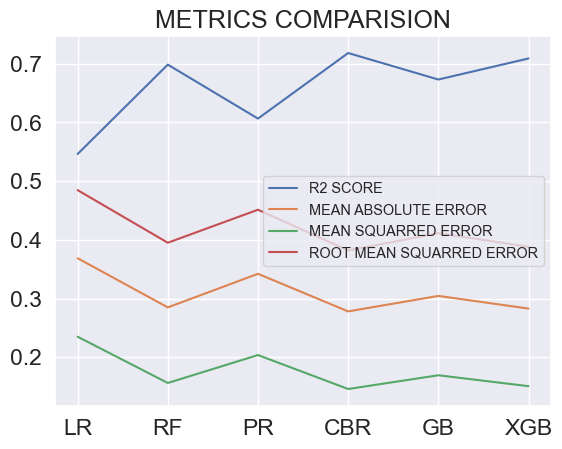

In [63]:
alg = ['LR','RF','PR','CBR','GB','XGB']
plt.plot(alg,a1)
plt.plot(alg,a2)
plt.plot(alg,a3)
plt.plot(alg,a4)
legend = ["R2 SCORE", "MEAN ABSOLUTE ERROR", "MEAN SQUARRED ERROR", "ROOT MEAN SQUARRED ERROR"]

plt.title("METRICS COMPARISION")
plt.legend(legend, loc= 'right', fontsize='xx-small')
plt.show()